

# <p style="background-color:white;font-family:newtimeroman;color:royalblue;font-size:170%;text-align:center;border-radius:20px 60px;">Lead-Scoring Analysis & Lead Retention Strategy</p>


![](https://assets.landingi.com/wp-content/uploads/2020/06/07084318/lead-generation-ideas-cover.jpg)


# <p style="background-color:azure;font-family:newtimeroman;font-size:130%;color:grey;text-align:left;border-radius:20px 60px;">Context</p>

### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

     The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

*Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.*

*There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.*

***X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score h have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.***
    


### Detailed presentation : https://github.com/anushka-DS/My_Projects/blob/master/Ed-tech%20Lead%20Scoring%20Analysis%20(Logistsic%20Regression)/Lead_Scoring_ppt.pdf



# <p style="background-color:azure;font-family:newtimeroman;font-size:130%;color:grey;text-align:center;border-radius:20px 60px;">CONTENTS</p>



* [1. INITIAL SETUP](#1)
    
* [2. DATA INSPECTION](#2)
    
* [3. DATA IMBALANCE CHECK](#3)    
    
* [4. EDA AND DATA CLEANING](#4)    
    
* [5. DUMMY VARIABLE CREATION](#5) 
      
* [6. TRAIN TEST SPLIT](#6)
    
* [7. DATA SCALING](#7)

* [8. Model Building using RFE and Stats Model](#8)
    
* [9. EVALUATING FEATURE IMPORTANCE](#9)
    
* [10. MODEL METRIC EVALUATION](#10)

* [11. MODEL VALIDATION](#11)
    
* [12. CONCLUSION](#12)

----------------



# <p style="background-color:white;font-family:newtimeroman;font-size:130%;color:grey;text-align:left;border-radius:20px 60px;">Let's Get Started . . .</p>

<a id="1"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Initial Setup</p>

### 1.1 Import required libraries

In [3]:
#basic python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
from math import isnan
from random import sample
from numpy.random import uniform


%matplotlib inline
##Import ML libraries and related dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


##Import Clustering libraries and related dependencies
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

ModuleNotFoundError: No module named 'seaborn'

### 1.2 Handle warnings

In [206]:
## supress warnings

import warnings
warnings.filterwarnings('ignore')

### 1.3 Load Data

In [207]:
leads = pd.read_csv('../input/lead-scoring-dataset/Lead Scoring.csv')
#pd.DataFrame(pd.read_csv('../input/Leads.csv'))

<a id="2"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Data Inspection</p>

In [208]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [209]:
leads.shape

(9240, 37)

In [210]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**We have a majority of categorical columns and hence we will be required to create dummies for these later**

In [211]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [212]:
leads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.00,9240,9204,9240,9240,9240.00,9103.00,9240.00,9103.00,...,9240,6531,7820,5022,5022,5022.00,5022.00,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.44,NaN,NaN,NaN,NaN,0.39,3.45,487.70,2.36,...,NaN,NaN,NaN,NaN,NaN,14.31,16.34,NaN,NaN,NaN
std,NaN,23406.00,NaN,NaN,NaN,NaN,0.49,4.85,548.02,2.16,...,NaN,NaN,NaN,NaN,NaN,1.39,1.81,NaN,NaN,NaN
min,NaN,579533.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,7.00,11.00,NaN,NaN,NaN
25%,NaN,596484.50,NaN,NaN,NaN,NaN,0.00,1.00,12.00,1.00,...,NaN,NaN,NaN,NaN,NaN,14.00,15.00,NaN,NaN,NaN
50%,NaN,615479.00,NaN,NaN,NaN,NaN,0.00,3.00,248.00,2.00,...,NaN,NaN,NaN,NaN,NaN,14.00,16.00,NaN,NaN,NaN
75%,NaN,637387.25,NaN,NaN,NaN,NaN,1.00,5.00,936.00,3.00,...,NaN,NaN,NaN,NaN,NaN,15.00,18.00,NaN,NaN,NaN


In [213]:
#check for duplicates

leads.duplicated().sum()

0

**Clearly we don't have any duplicate value in any of the columns**

<a id="3"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Data Imbalance Check</p>

#### View the distribution on Converted and Non-Converted Leads

In [214]:
leads['Converted'].value_counts(normalize = True, dropna=False) * 100

0   61.46
1   38.54
Name: Converted, dtype: float64

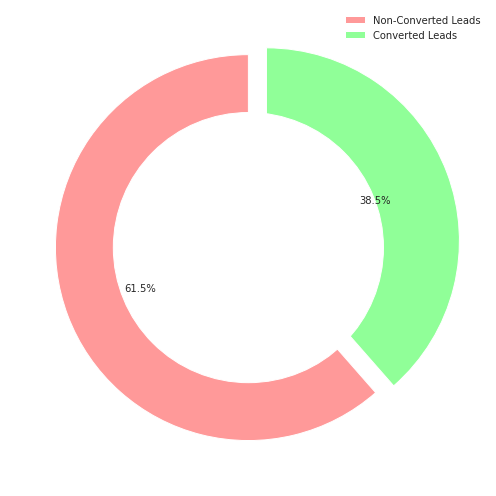

In [215]:
plt.figure(figsize=(7,8))
plt.pie(leads['Converted'].value_counts(normalize = True, dropna=False) * 100, autopct='%1.1f%%', colors = ['#ff9999','#90ff98'], startangle=90, explode = (0, 0.1))

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(labels = ["Non-Converted Leads", 'Converted Leads'], loc="upper right")
plt.tight_layout()
plt.show()

A clear imbalance can be spotted between the 2 categories.

    More than 60% of the Leads fall under "Not-Converted" category


<a id="4"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Data Cleaning & EDA</p>

![](https://raw.githubusercontent.com/anushka-DS/My_Projects/master/Ed-tech%20Lead%20Scoring%20Analysis%20(Logistsic%20Regression)/pics/p5.png)

#### Steps Followed :

    1. Drop columns with missing values > 40%
    
    2. Drop rows/records with more than 70% null values (noisy records)
    
    3. Drop unique valued columns (they are of no use to our analysis)
    
    4. Replace "Select" occurences with Nan as they are as good as null (No value provided)
     
    5. EDA followed by suitable imputations for each variable : 
        
        A. CATEGORIC COLUMNS
         
            i)   Club lower occurrence values together for categorical columns   
            ii)  Create a specific column "Not-Specified" for NaNs
            iii) For less number of NaNs, we can impute them with Mode
            iv)  Finally, view the spread of variables
             v)  Drop columns generated by SALES TEAM (to prevent model overfitting)
            vi)  Drop heavily skewed/biased columns
            
            
            
        B. NUMERIC COLUMNS
        
            i) Check value count and impute NaN with Median
            ii) View spread through Box-plot 
            iii) Outlier treatment
            iv) Univariate analysis
             v) Bivariate analysis   
        
    
    6. Finally we will check the number of rows and columns retained after Data Cleaning
    



# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;">4.1 Drop columns with more than 40% missing values </p>

In [216]:
# checking percentage of nulls for each column

round(leads.isnull().sum()/len(leads)*100, 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

##### Clearly there is a presence of many null values across various columns in our dataset. We need to treat them suitably. 

It doesn't make any sense to have columns with missing value percentahes as high as 45 and 51. Even imputing such high percentage can impact our analysis and hence we can drop them.

In [217]:
# Dropping columns having more than 40% null values

col_drop = leads.isnull().sum()
col_drop = col_drop[col_drop.values/len(leads) > 0.40]
col_drop

Lead Quality                   4767
Asymmetrique Activity Index    4218
Asymmetrique Profile Index     4218
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

In [218]:
len(col_drop)

5

In [219]:
# Dropping the columns with null values more than 40%

def removeNullCol(dataframe, percent = 0.40):
    leads = dataframe.copy()
    df_shape = leads.shape
    col_names = (leads.isnull().sum()/len(leads))
    col_names = list(col_names[col_names.values > percent].index)
    leads.drop(labels = col_names, axis = 1, inplace=True)
    print("Total columns dropped : " , len(col_names))
    print("Original shape of dataframe : ", df_shape)
    print("New shape of dataframe : ", leads.shape)
    return  leads

In [220]:
leads = removeNullCol(leads, percent = 0.40)

Total columns dropped :  5
Original shape of dataframe :  (9240, 37)
New shape of dataframe :  (9240, 32)


In [221]:
round(leads.isnull().sum()/len(leads)*100, 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [222]:
leads.shape

(9240, 32)


# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;">4.2 Drop Noisy Records (if any) </p>

**Records with more than 70% null values are considered Noisy and must be dropped**

    Total number of variables now (columns) : 32
        70% of 32 = 22 (approx)
    
Rows with more than 22 null values (if any) should be dropped

In [223]:
leads[leads.isnull().sum(axis=1) > 22]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


    We don't have any such record in our Dataset

In [224]:
leads.shape

(9240, 32)


# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;">4.3 Removing unnecesary columns (unique-valued)
</p>

In [225]:
# Columns like 'Prospect ID' and 'Lead Number' are certainly of no use in our analysis and hence we can drop them. 

leads = leads.drop(['Prospect ID', 'Lead Number'], 1)

**Note :**  We will use either of the above columns in our Final step for assigning the Lead Scores 

# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;">4.4 Replace all "Select" with NaN
</p>

In [226]:
# 'Select' values seem to have been left unattended by many users in non numeric columns. We can replace them with NaN
leads = leads.replace('Select', np.nan)

In [227]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


**As per the initial data, we have around 38% Conversion Rate**


# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;">4.5 EDA and corresponding modifications" with NaN
</p>

 Imputation and modifications for remaining columns :

    - Clubbed together low occurrence values
    - Imputed missing values with mode (for discrete columns)
    - Renamed Nans with "Not Specified" for Select type columns
    - Plotted the spread for each category variable
    - Dropped heavily skewed columns (which show bias even after performing above steps)

#### 4.5.1  Lead Profile

In [228]:
#Analyzing Lead Profile
leads['Lead Profile'].value_counts(dropna=False).head()

NaN                      6855
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Lateral Student            24
Name: Lead Profile, dtype: int64

Highest number of columns here are nulls and we can fill them as **"Lead Level not specified"**

In [229]:
leads['Lead Profile'] = leads['Lead Profile'].replace(np.nan, 'Lead Level not specified')

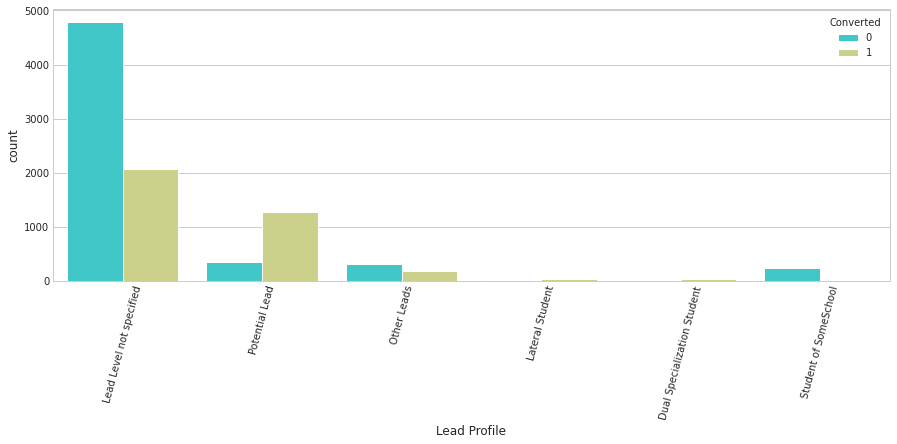

In [230]:
#PLotting the spread of 'Lead Profile'

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Lead Profile'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

#### Inference

- No major info can be drawn from the above plot as majority of leads haven't been assigned any label.
- At most we can say that leads under Potential Lead profile have the highest conversion rate.

**This may not be of any major use to our analysis or model Hence we will drop this column**


In [231]:
leads = leads.drop(['Lead Profile'], axis=1)

#### 4.5.2  How did you hear about X Education

In [232]:
#Analyzing How did you hear about X Education column

leads['How did you hear about X Education'].value_counts(dropna=False).head()

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Name: How did you hear about X Education, dtype: int64

Again we have a majority of null values here. Let's replace them with **'Not specified'**

In [233]:
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace(np.nan, 'Not specified')

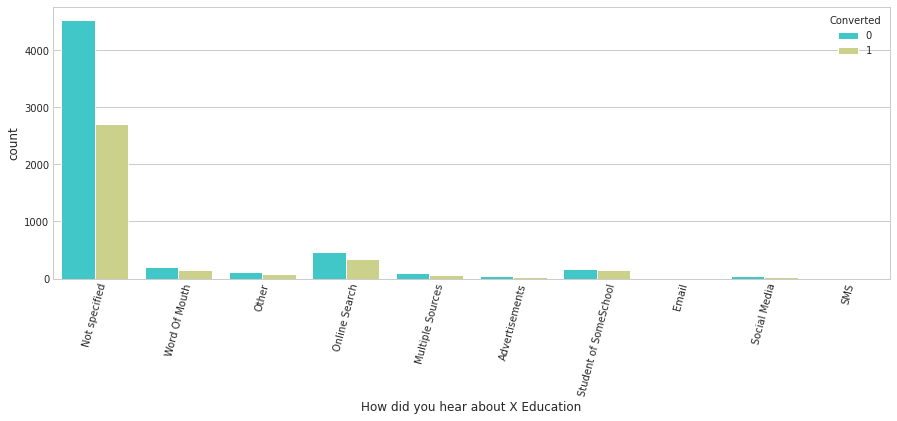

In [234]:
#PLotting the spread of 'How did you hear about X Education'

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['How did you hear about X Education'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()


Again, no major info can be drawn from the above plot as **majority of leads haven't specifed any source.**

**We can hence drop this column as it will be of no use to our analysis**

In [235]:
leads = leads.drop(['How did you hear about X Education'], axis=1)

#### 4.5.3 Lead Source

In [236]:
#Analyzing Lead Source
leads['Lead Source'].value_counts(dropna=False).head(10)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
NaN                   36
bing                   6
Name: Lead Source, dtype: int64

Since **Google has the highest occurence**, we can imput missing values with it and club the lower frequency values to 'Others'

In [237]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Others')

In [238]:
#there is another tag with G in lowercase for Google. We can replace it with Google

leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

#we can also club social media and Facebook as they represent a common source
leads['Lead Source'] = leads['Lead Source'].replace('Facebook', 'Social Media')

In [239]:
#clubbing together low occurrence values as "Others"
leads['Lead Source'] = leads['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'youtubechannel', 'welearnblog_Home', 'WeLearn', 'blog', 'Pay per Click Ads' , 'Live Chat', 'Referral Sites' , 'testone', 'NC_EDM'], 'Others')

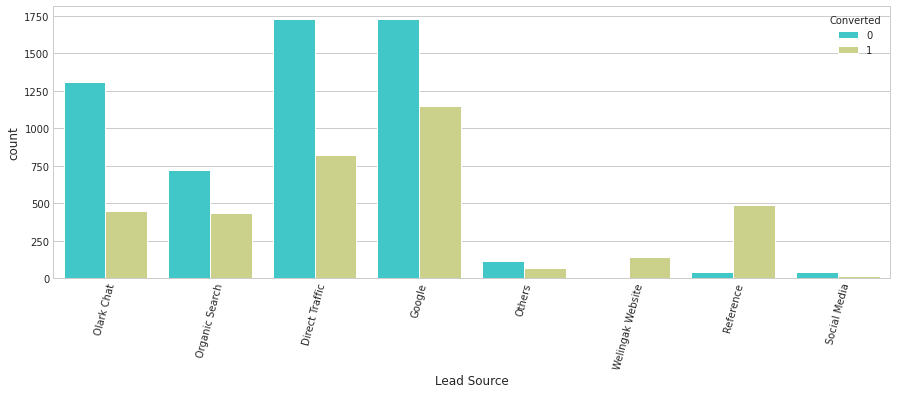

In [240]:
#PLotting the spread of 'Lead Source'

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Lead Source'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

**Inference**

- Majority of the converted leads come from Google and Direct Traffic. These should be used more to generate further leads
- Conversion rate is highest for leads coming from Welingak Website followed by Reference.
- Leads from other sources show a medium or poor conversion rate and hence company needs to focus and act upon these sources.

#### 4.5.4 Country

In [241]:
#Analyzing 'Country' column
leads['Country'].value_counts(dropna=False).head()

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Name: Country, dtype: int64

In [242]:
#Imputation
leads['Country'] = leads['Country'].replace(np.nan, 'India')

In [243]:
leads['Country'] = leads['Country'].replace(['United States', 'United Arab Emirates', 'Singapore', 'Qatar', 'Saudi Arabia', 'Australia', 'United Kingdom', 'France', 'Oman', 'Bahrain', 'Canada', 'Germany', 'Russia', 'Belgium', 'Sri Lanka', 'China', 'Netherlands', 'Sweden', 'Kenya', 'Italy', 'Tanzania', 'Malaysia', 'Liberia', 'Switzerland', 'Denmark', 'Philippines' , 'Bangladesh', 'Indonesia', 'Uganda', 'Asia/Pacific Region', 'Ghana', 'Kuwait', 'Nigeria', 'South Africa', 'Vietnam', 'Nigeria', 'Hong Kong', 'unknown'], 'Non-India')

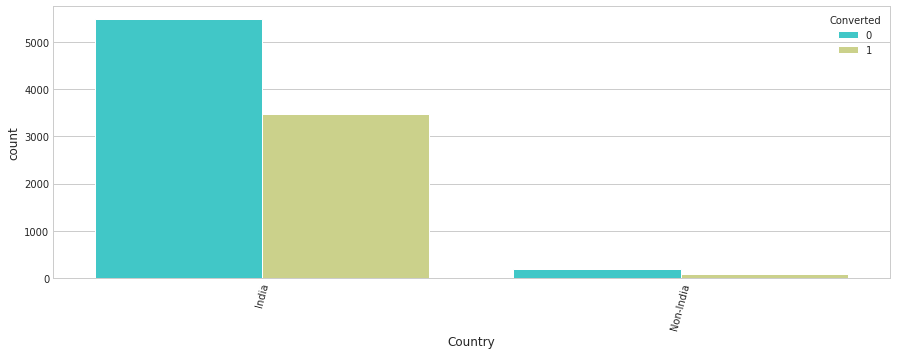

In [244]:
#PLOT to analyse the spread of Country

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Country'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()
                         

**India seems to be have the highest occurrence followed by null values. There is a clear skewness in data here. We can either drop the column or impute the missing values with "India"**

Even after imputation the skewness is likely to persist and hence it is better to drop this column

In [245]:
# creating a new list named 'drop_cols' containing all columns that we further need to drop

drop_cols = ['Country']

We see highest occurrence of "Mumbai" followed by null values. Let us impute the missing values and see if skewness persists

In [246]:
#Mappping values for Binary variable

leads['Country'] = leads['Country'].replace('India', 'Yes')
leads['Country'] = leads['Country'].replace('Cities (Non-India)', 'No')

#### 4.5.5 City

In [247]:
#analyzing 'City' column
leads['City'].value_counts(dropna=False).head(7)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We see highest occurrence of **"Mumbai" followed by null values**.

    Let us impute the missing values and see if skewness persists

In [248]:
#Imputation
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

In [249]:
leads['City'] = leads['City'].replace(['Other Cities', 'Other Metro Cities','Other Cities of Maharashtra', 'Thane & Outskirts','Tier II Cities'],  'Cities (excluding Mumbai)')


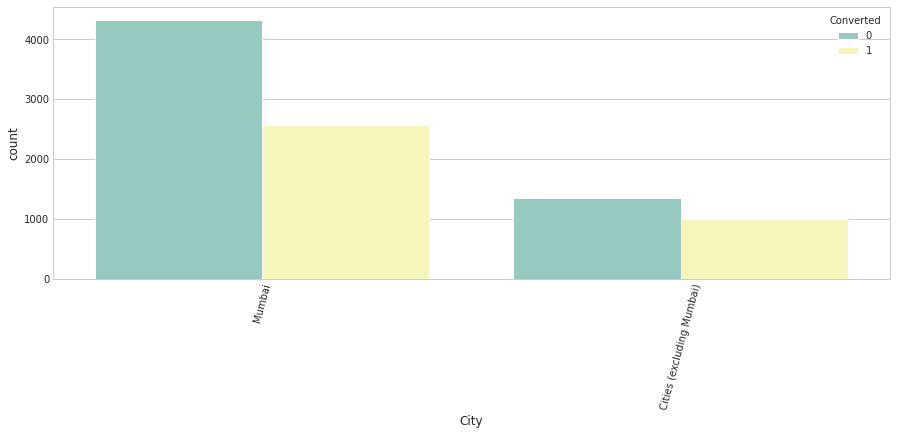

In [250]:
#PLOT to analyse the spread of City

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['City'],hue = leads.Converted, palette="Set3")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()


**A pretty high skewness here as well although less than Country. We can keep this for now**

    It is now a Binary variables and can be mapped as : Yes (Mumbai) and No (Other Cities)
        
**But as this may not help us in any way while analyzing the Potential Lead, we can get rid of it later before Dummy Creation**

In [251]:
#Mappping values for Binary variable

leads['City'] = leads['City'].replace('Mumbai', 'Yes')
leads['City'] = leads['City'].replace('Cities (excluding Mumbai)', 'No')

#### 4.5.6 Specialization

In [252]:
#analyzing 'Specialization' column
leads['Specialization'].value_counts(dropna=False).head()

NaN                          3380
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

Highest occurrence of nulls here followed by other values. There isn't a skewness issue here and hence we should not drop this column. In order to better understand this, we can have a valid value for all nulls

In [253]:
#replacing null values with "Not specified"
leads['Specialization']= leads['Specialization'].replace(np.nan, 'Not specified')

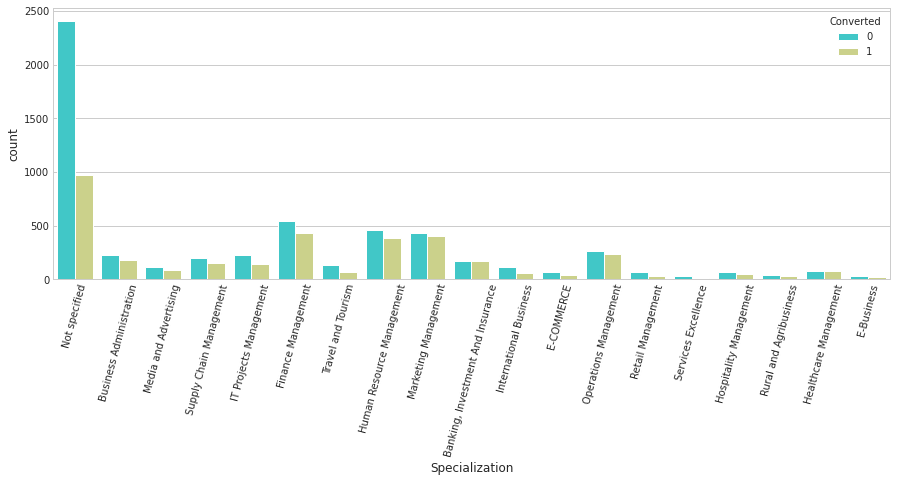

In [254]:
#PLOT to analyse the spread of Specialization

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Specialization'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

**Finance, HR and Marketing management** seems to have the highest occurrence followed by other management categories with a better lead conversion rate too. This indeed can be useful for our analysis.


We will keep this column and merge them into a common category : 'Management_specializations' for better understanding

#### Clubbing together Specialization values in 3 categories :

    Management_specializations
    
    Industrial Specializations
    
    Business Specializations
    
    

In [255]:
leads['Specialization'] = leads['Specialization'].replace(['IT Projects Management', 'Human Resource Management', 'Supply Chain Management', 'Finance Management', 'Marketing Management', 'Hospitality Management', 'Healthcare Management', 'Retail Management', 'Operations Management'], 'Management_specializations')

leads['Specialization'] = leads['Specialization'].replace(['Services Excellence', 'E-COMMERCE', 'Travel and Tourism', 'Banking, Investment And Insurance', 'Media and Advertising', 'Investment And Insurance'], 'Industrial Specializations')

leads['Specialization'] = leads['Specialization'].replace(['Business Administration', 'Rural and Agribusiness', 'E-Business', 'International Business'], 'Business Specializations')

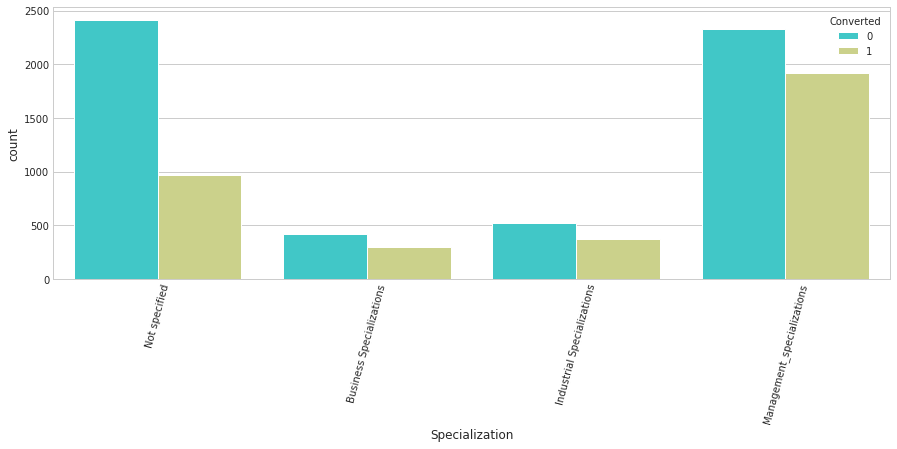

In [256]:
#plotting the new Specializations colummn

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Specialization'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

### Note :

**There is a sense of high skewness here despite clubbing the low occurrence values.**

    This may lead to a bias in our model as well after creating dummies and dropping the "Not specified" label as Management_Specialization is in high majority

    Hence we need to get rid of it and will append it drop_cols

In [257]:
drop_cols.append('Specialization')


#### 4.5.7 What is your current occupation

In [258]:
#analyzing 'What is your current occupation' column
leads['What is your current occupation'].value_counts(dropna=False).head()

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Name: What is your current occupation, dtype: int64

Highest occurrence here (mode) = Unemployed. Now we have 2 options :

    1. We can add a "Not Specified" column with all missing values and check the spread.
    
    2. Impute missing values with mode : Unemployed and check the spread
        
**We will go with the first option to ensure any minimal chances of incorrect labelling of NaN**

In [259]:
#replacing null values with "Not Specified"
leads['What is your current occupation']= leads['What is your current occupation'].replace(np.nan, 'Not Specified')


#### Clubbing together low occurence values : Student, Housewife, Businessman and Others into "Students and Others"

In [260]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Housewife', 'Student', 'Businessman', 'Other'], 'Students and Others')

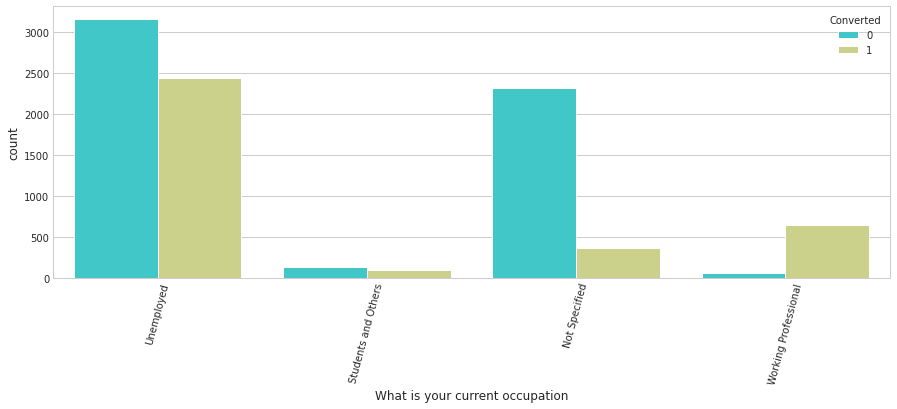

In [261]:
#plotting the new Occupation colummn

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['What is your current occupation'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

#### Inference

 - Unemployed leads are in majority, however their conversion rate is nearly around 50%
 - Working professionsal are second highest leads and there conversion rate is high

#### 4.5.8 What matters most to you in choosing a course

In [262]:
#analyzing 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(dropna=False).head()

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Highest occurrence is that of  : 'Better Career prospects' followed by nulls**. We can impute the null values with Mode and check the spread

In [263]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [264]:
leads['What matters most to you in choosing a course'] =  leads['What matters most to you in choosing a course'].replace(['Flexibility & Convenience', 'Other'], 'Better Career Prospects')

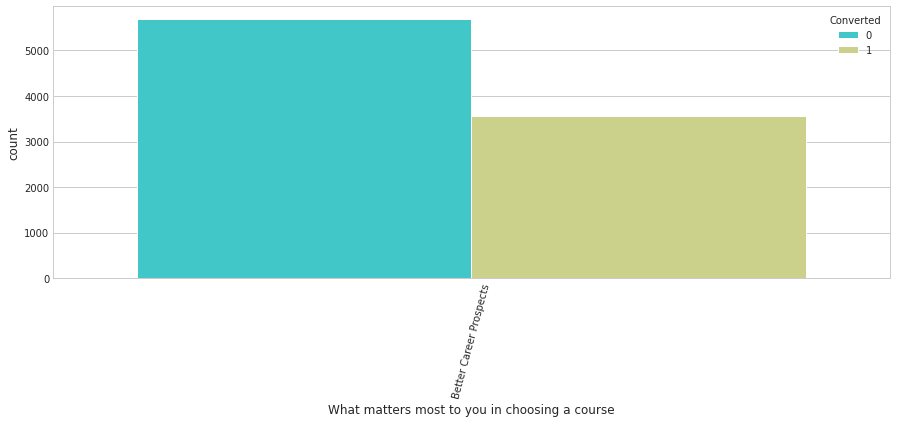

In [265]:
#plotting the 'What matters most to you in choosing a course' colummn

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['What matters most to you in choosing a course'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

#### This turns out to be a highly skewed column again. Hence no point having it, we can drop this one.

In [266]:
drop_cols.append('What matters most to you in choosing a course')

#### 4.5.9 Tags

In [267]:
#analyzing 'Tags' column

leads['Tags'].value_counts(dropna=False).head()

NaN                                    3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

 We again see majority of nulls here followed by other values. Let's replace all nulls with "Not specified"

In [268]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not specified')

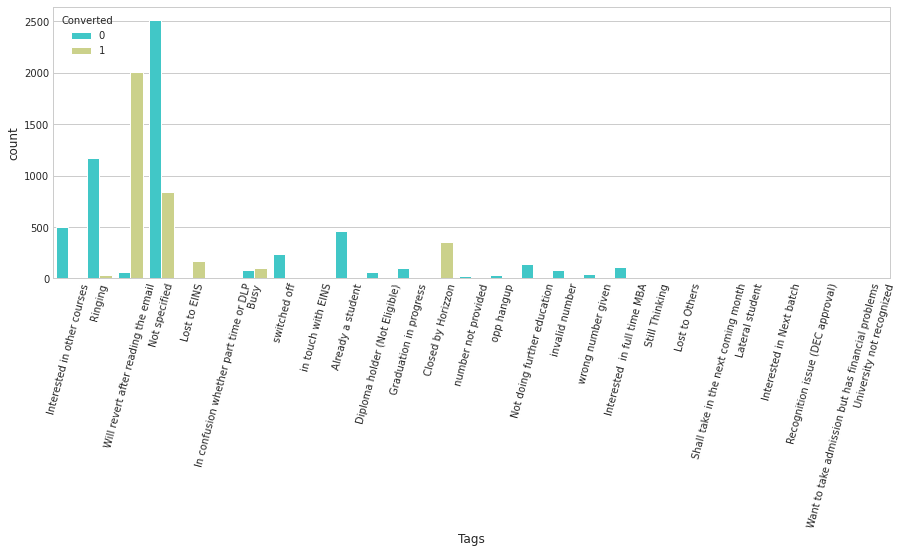

In [269]:
#plotting the 'Tags' colummn

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Tags'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

**There are multiple lower frequency tags which can be clubbed together**

In [270]:
#Replacing all lower frequency tags as 'Other tags'

leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'Lost to EINS', 'in touch with EINS', 'Diploma holder (Not Eligible)', 'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup', 'Still Thinking', 'Lost to Others', 'Shall take it in the next coming month', 'Interested in Next batch', 'Recognition issue (DEC approval)', 'Want to take admission but has financial problems', 'University not recognized', 'switched off', 'Already a student', 'Not doing further education', 'invalid number', 'wrong number given', 'Interested in full time MBA', 'Shall take in the next coming month', 'Lateral student'], 'Other_Tags')

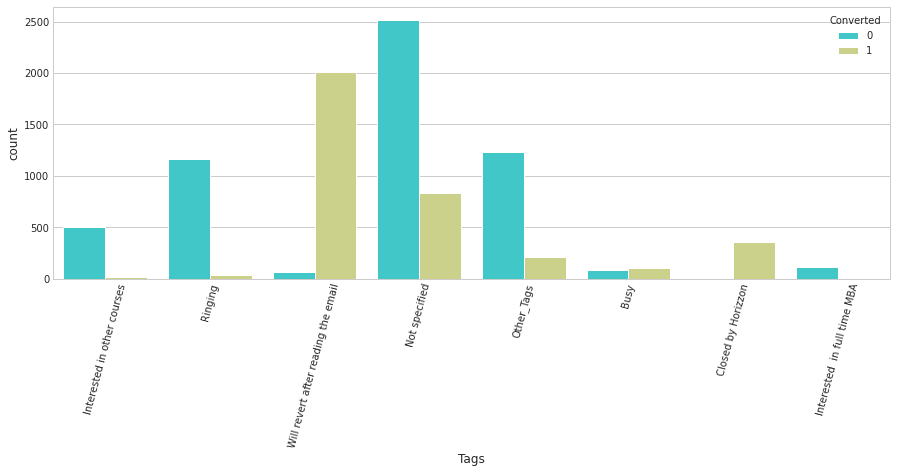

In [271]:
#plotting the new 'Tags' colummn

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Tags'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

This looks a lot better.

    The maximum leads who converted belong to 'Will revert after reading the email' Tag category

    Tags Closed by Horizzon also have a very high conversion rate (almost 100%)

#### 4.5.10 Last Activity

In [272]:
#analyzing 'Last Activity' column

leads['Last Activity'].value_counts(dropna=False).head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

Mode here is : **Email Opened, however SMS Sent** is very close in numbers to it. Hence imputing nulls with mode may lead to an issue later.
    
    We can club NaNs and other low frequency values with "Others"

In [273]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Others')

In [274]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Others')

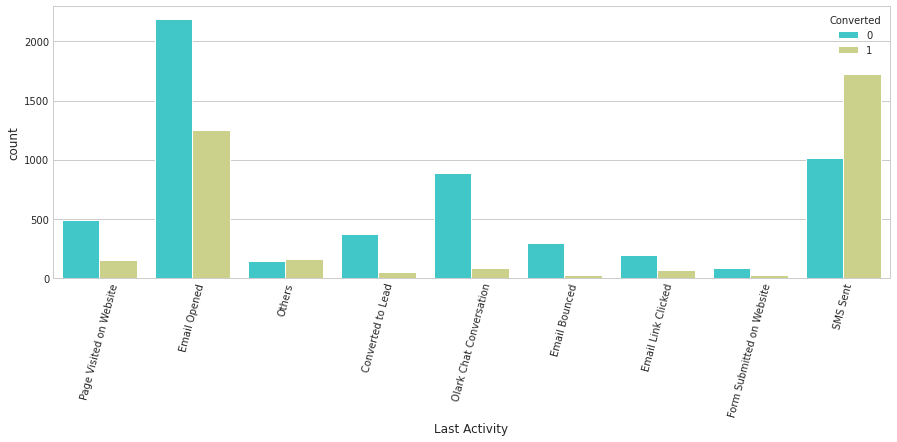

In [275]:
#plotting the new 'Last Activity' colummn

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Last Activity'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

#### Inference 

    1. Leads with SMS Sent as last activity have the highest conversion rate among all

    2. Leads with Email Opened have a moderate chance of getting converted (around 50%). It indeed needs attention

#### 4.5.11 Last Notable Activity

In [276]:
#analyzing 'Last Notable Activity' column

leads['Last Notable Activity'].value_counts(dropna=False).head()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Name: Last Notable Activity, dtype: int64

**This is quite similar as above category "Last activity". We can plot it to see the spread**

In [277]:
#analyzing 'What is your current occupation' column
leads['Last Notable Activity'].value_counts(dropna=False).head()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Name: Last Notable Activity, dtype: int64

#### Huge gap exists between activities. We can club all the lower frequecy activities together for a better analysis

In [278]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Marked Spam', 'Had a Phone Conversation', 'Unreachable', 'Resubscribed to emails', 'Approached upfront', 'Form Submitted on Website', 'Unsubscribed', 'Email Bounced', 'View in browser lit', 'View in browser link Clicked', 'Email Received'], 'Other activities')

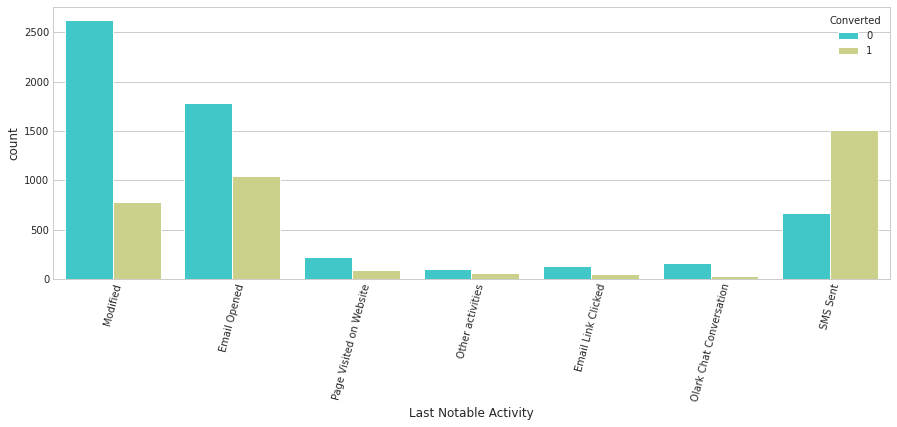

In [279]:
#plotting the 'Last Notable Activity' colummn

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Last Notable Activity'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

#### Inference

- Maximum leads have last seen activity as : **Modified followed by Email opened, but have very poor conversion rate**
    
    
- Highest conversion rate is that of leads whose last activity was **SMS Sent**

#### 4.5.12 Lead Origin

In [280]:
#analyzing 'Lead Origin' column

leads['Lead Origin'].value_counts(dropna=False).head()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

#### Clubbing together low occurrence values as "Others"

In [281]:
leads['Lead Origin'] =  leads['Lead Origin'].replace(['Quick Add Form', 'Lead Import'], 'Others')

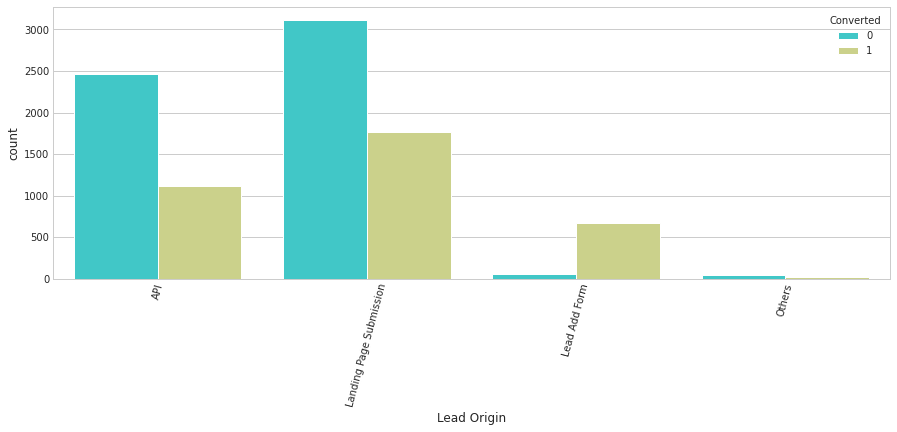

In [282]:
#plotting the new 'Lead Origin' colummn

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(leads['Lead Origin'],hue = leads.Converted, palette="rainbow")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

#### Inference

- **Landing Page Submission followed by API bring in higher number of leads** and have moderate to fair conversion rate. Company needs to improve lead conversion here

- **Lead Add Form has a very high conversion rate**, however not many leads come in through this. Company needs to focus here in order to bring more leads.

- Lead Import and Quick Add Form has has a poor conversion rate and bring in very minimal leads

### 5.A v) Drop columns provided by SALES TEAM

Following variables are not part of the original data, rather generated by the **SALES TEAM.**
**These might result in overfitting of our mode** as they it is a form of pre-verified labelled data about the conversion of Leads

    - Tags
    - Last Activity
    - Last Notable Activity
    - Lead Quality
    - Lead Profile
    

In [283]:
#We will add them to the drop_cols list

drop_cols.extend(['Tags' , 'Last Activity', 'Last Notable Activity'])

## Columns : 'Lead Quality', 'Lead Profile' have already been dropped due to missing values and skewness respectively

### 5.A vi) Analyzing Highly Imbalanced and Skewed categorical columns

**There are many columns where the values are skewed/biased upto 90%. They can lead to a biased model and hence, must be dropped.**

#### 4.5.13 Do Not Email and Do Not Call

In [284]:
#analyzing columns : 'Do Not Call' and 'Do not Email' columns
leads['Do Not Email'].value_counts(dropna=False).head()


No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [285]:
leads['Do Not Call'].value_counts(dropna=False).head()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

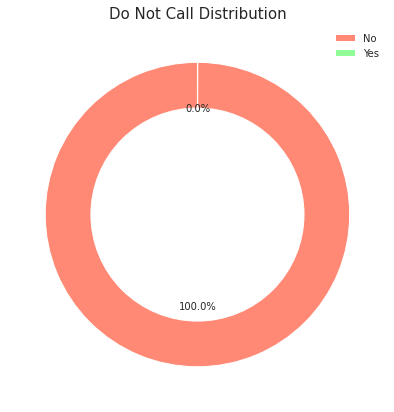

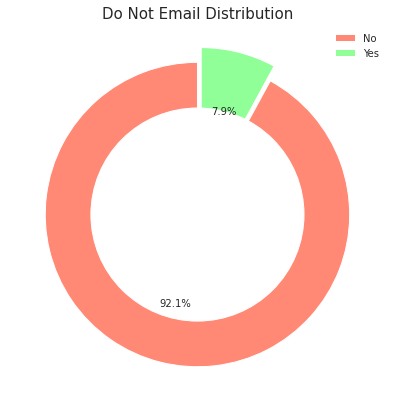

In [286]:
# Check the distribution of both the above variables using Pie Plots


plt.figure(figsize=(7,7))
ax1 = plt.pie(leads['Do Not Call'].value_counts(normalize = True, dropna=False) * 100, autopct='%1.1f%%', colors = ['#ff8975', '#90ff98'], startangle=90, explode = (0, 0.1))
plt.legend(labels = ["No", "Yes"], loc="upper right")
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.title('Do Not Call Distribution', fontsize = 15)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

plt.figure(figsize=(7,7))
ax2 = plt.pie(leads['Do Not Email'].value_counts(normalize = True, dropna=False) * 100, autopct='%1.1f%%', colors = ['#ff8975', '#90ff98'], startangle=90, explode = (0, 0.1))
plt.legend(labels = ["No", "Yes"], loc="upper right")
plt.title('Do Not Email Distribution', fontsize = 15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


Both the above columns look highly **skewed** :
    
    Do Not Email : 92% responses are No (it may turn out to be an imp binary column and will keep it for now)
        
    Do Not Call : 100% responses are No (can lead to a Biased Model and we must get rid of it)
        


In [287]:
drop_cols.append('Do Not Call')

#### 4.5.13 Other skewed Columns :

    'Search' , 'Magazine', 'Newspaper Article', 'X Education Forums' , 'Newspaper' , 'Digital Advertisement',
    
    'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content' ,
    
    'Get updates on DM Content', 'I agree to pay the amount through cheque' and 'A free copy of Mastering The Interview'

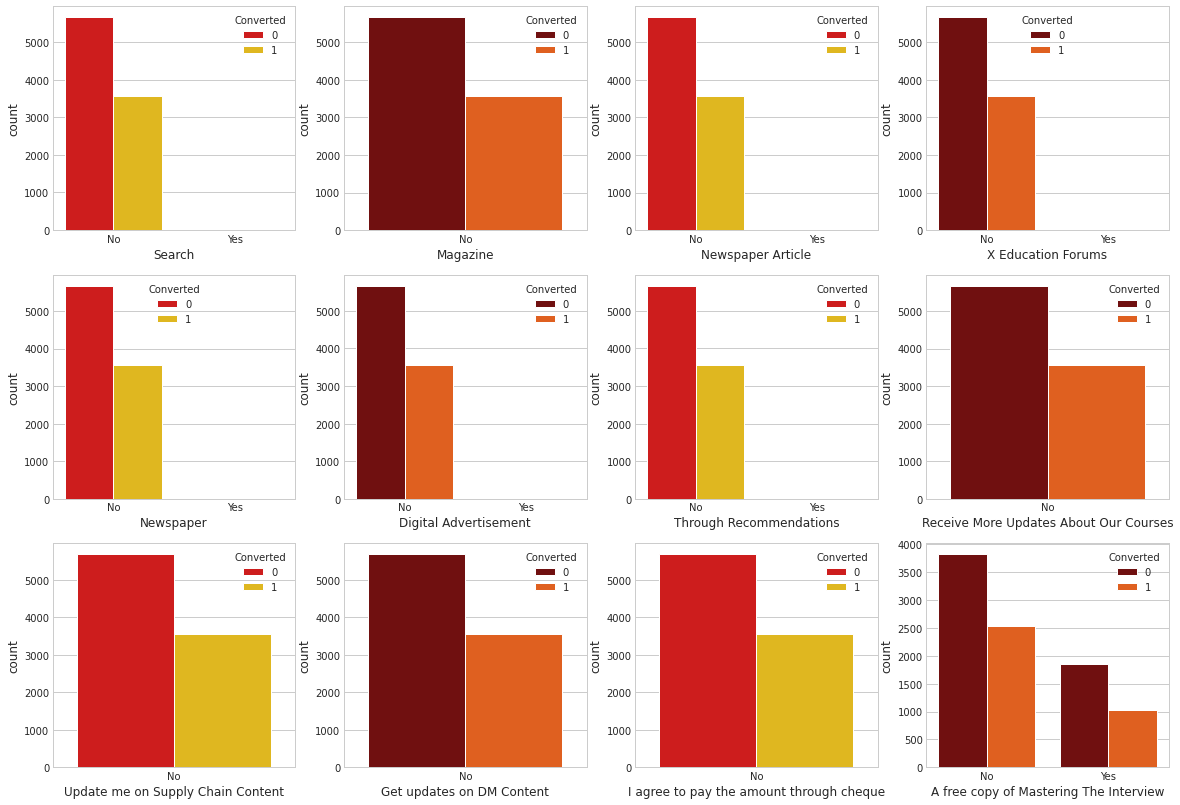

In [288]:
fig, axes = plt.subplots(3,4, figsize = (20,14))


sns.countplot(x= "Search", hue = 'Converted', data = leads, ax=axes[0,0], palette = 'hot')

sns.countplot(x= "Magazine", hue = 'Converted', data = leads, ax=axes[0,1], palette ='gist_heat')

sns.countplot(x= "Newspaper Article", hue = 'Converted', data = leads, ax=axes[0,2], palette = 'hot')

sns.countplot(x= "X Education Forums", hue = 'Converted', data = leads, ax=axes[0,3], palette = 'gist_heat')

sns.countplot(x= "Newspaper", hue = 'Converted', data = leads, ax=axes[1,0], palette = 'hot')

sns.countplot(x= "Digital Advertisement", hue = 'Converted', data = leads, ax=axes[1,1], palette= 'gist_heat')

sns.countplot(x= "Through Recommendations", hue = 'Converted', data = leads, ax=axes[1,2], palette = 'hot')

sns.countplot(x= "Receive More Updates About Our Courses", hue = 'Converted', data = leads, ax=axes[1,3], palette = 'gist_heat')

sns.countplot(x= "Update me on Supply Chain Content", hue = 'Converted', data = leads, ax=axes[2,0], palette = 'hot')

sns.countplot(x= "Get updates on DM Content", hue = 'Converted', data = leads, ax=axes[2,1], palette = 'gist_heat')

sns.countplot(x= "I agree to pay the amount through cheque", hue = 'Converted', data = leads, ax=axes[2,2], palette = 'hot')

sns.countplot(x= "A free copy of Mastering The Interview", hue = 'Converted', data = leads, ax=axes[2,3], palette = 'gist_heat')


plt.show()



   
    
All, except variable : **A free copy of Mastering The Interview** are highly biased and we need to get rid of them
    
    Appending all the above to the list drop_cols

In [289]:
#ADDING ALL THE ABOVE SKEWED COLUMNS IN THE LIST OF COLUMNS THAT NEED TO BE DROPPED

drop_cols.extend(['Search' , 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City' , 'I agree to pay the amount through cheque'])

In [290]:
leads = leads.drop(drop_cols, 1)

In [291]:
leads.shape

(9240, 9)

    We have a total of 9 variables in total as of now

In [292]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')


# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;">Numerical columns analysis
</p>

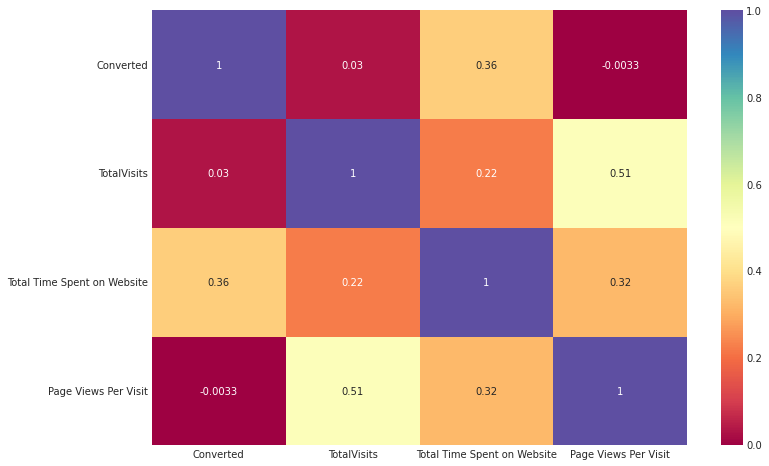

In [293]:
# we can first check out the correlation between all numerical columns

plt.figure(figsize=(12,8))
sns.heatmap(leads.corr(), cmap='Spectral', annot=True)
plt.show()

No significant correlation observed. Hence no need for any column to be dropped

No major information can be drawn from any of the above Numeric columns regarding the rate of conversion

#### 4.5.14 TotalVisits

In [294]:
leads['TotalVisits'].value_counts(dropna=False).head()

0.00    2189
2.00    1680
3.00    1306
4.00    1120
5.00     783
Name: TotalVisits, dtype: int64

 Imputing the missing values with **Median**

In [295]:
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)

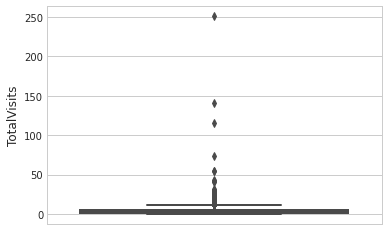

In [296]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

**Clear presence of outliers here**

In [297]:
#TotalVisits column

leads['TotalVisits'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count   9240.00
mean       3.44
std        4.82
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

#### Treating outlier

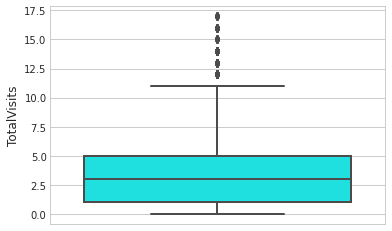

In [298]:
## We can remove top and bottom 0.01, i.e 1% of the outlier values

Q3 = leads['TotalVisits'].quantile(0.99)
leads = leads[(leads.TotalVisits<=Q3)]
               
Q1 = leads['TotalVisits'].quantile(0.01)
leads = leads[(leads.TotalVisits>=Q1)]
               
sns.boxplot(y=leads['TotalVisits'], color='cyan')
plt.style.use('seaborn-whitegrid')
plt.show()

#### 4.5.15 Total Time Spent on Website

In [299]:
leads['Total Time Spent on Website'].value_counts(dropna=False).head()

0      2193
60       19
127      18
75       18
74       17
Name: Total Time Spent on Website, dtype: int64

In [300]:
#Total Time Spent on Website column

leads['Total Time Spent on Website'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count   9157.00
mean     486.19
std      547.70
min        0.00
5%         0.00
25%       10.00
50%      247.00
75%      933.00
90%     1379.00
95%     1559.40
99%     1839.44
max     2272.00
Name: Total Time Spent on Website, dtype: float64

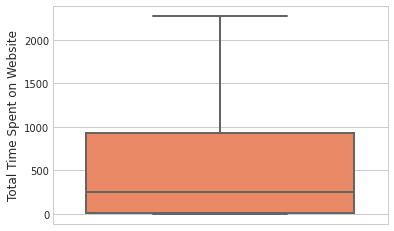

In [301]:
#Plot the spread

sns.boxplot(y=leads['Total Time Spent on Website'], color='coral')
plt.style.use('seaborn-whitegrid')
plt.show()

**No clear presence of outliers here, hence no outlier treatment required**

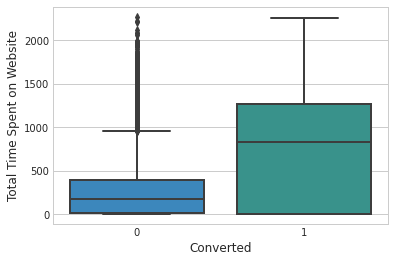

In [302]:
# Checking the spread of 'Total Time Spent on Website' vs Converted leads

sns.boxplot(x= leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

#### Inference

- Leads who spent more time on the website are more liekly to get converted

#### 4.5.16 Page Views Per Visit

In [303]:
leads['Page Views Per Visit'].value_counts(dropna=False).head()

0.00    2189
2.00    1792
3.00    1193
4.00     893
1.00     651
Name: Page Views Per Visit, dtype: int64

In [304]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)

In [305]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].astype('int')

In [306]:
#Page Views Per Visit column

leads['Page Views Per Visit'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count   9157.00
mean       2.27
std        2.05
min        0.00
5%         0.00
25%        1.00
50%        2.00
75%        3.00
90%        5.00
95%        6.00
99%        9.00
max       16.00
Name: Page Views Per Visit, dtype: float64

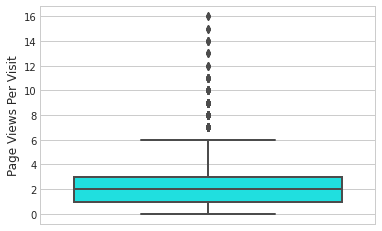

In [307]:
#Clear presence of outliers here

sns.boxplot(y=leads['Page Views Per Visit'], color='cyan')
plt.style.use('seaborn-whitegrid')
plt.show()

#### Treating outlier

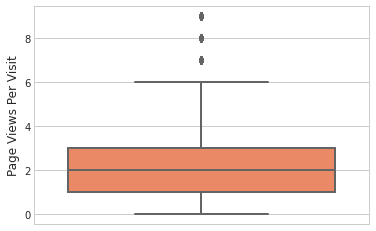

In [308]:
## We can remove top and bottom 0.01, i.e 1% of the outlier values

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads.TotalVisits<=Q3)]
               
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads.TotalVisits>=Q1)]
               
sns.boxplot(y=leads['Page Views Per Visit'], color='coral')
plt.style.use('seaborn-whitegrid')
plt.show()

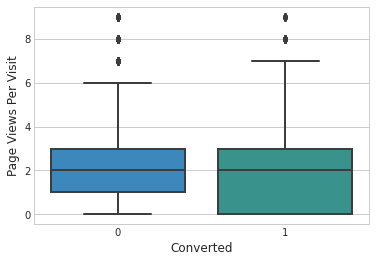

In [309]:
# Checking the spread of 'Total Time Spent on Website' vs Converted leads

sns.boxplot(x= leads.Converted, y=leads['Page Views Per Visit'])
plt.show()

#### Inference

- No specific info can be gathered using this parameter
- There is a similar median for both converted and unconverted leads
- There are hardly any leads view beyond 5 page views per visit


### 4.5.B iv)  Numeric-Univariate Analysis

In [310]:
# Let's now view the Density spread of each numeric column

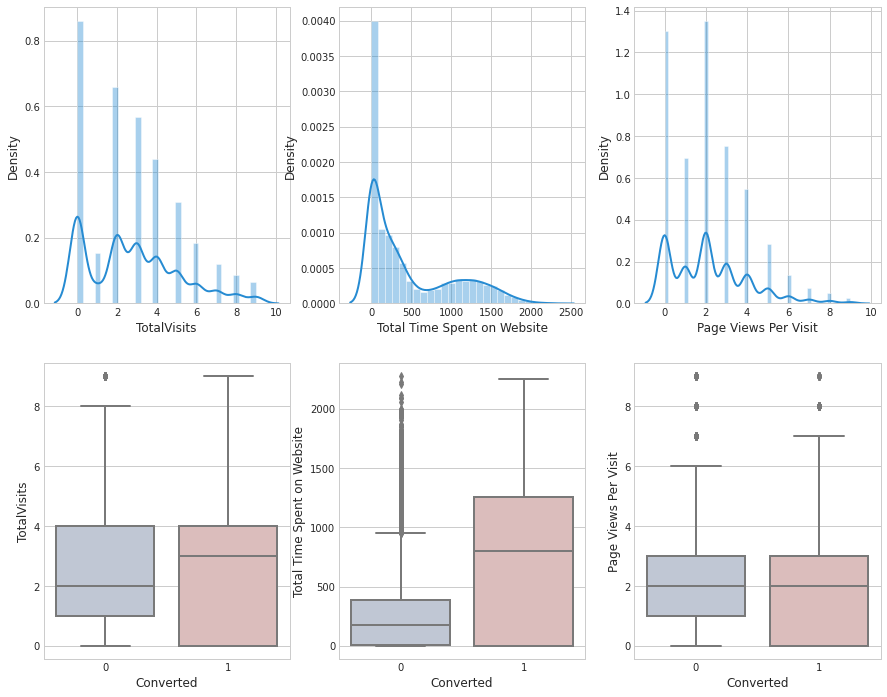

In [311]:
num_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(15,12))

i=1
for col in num_col :
    plt.subplot(2,3,i)
    sns.distplot(leads[col])
    plt.subplot(2, 3, 3+i)
    sns.boxplot(y=leads[col], x=leads['Converted'],  palette = 'vlag')
    i+= 1

### 4.5.B v) Numeric-Bivariate Analysis

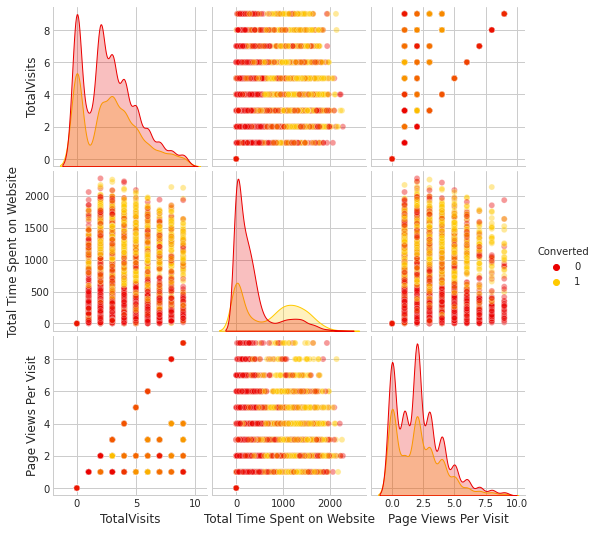

In [312]:
num_cols = pd.Series(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted'])
sns.pairplot(leads[num_cols] , hue = 'Converted', kind='scatter', plot_kws= {'alpha': 0.4}, palette = 'hot')


### 4.6 Check the finally dataset (retained rows and columns)

In [313]:
## let us finally check the null percentage in remaining columns

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                              0.00
Lead Source                              0.00
Do Not Email                             0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
What is your current occupation          0.00
A free copy of Mastering The Interview   0.00
dtype: float64

#### Finally we have made sure there aren't any missing values in any of the columns in our dataset.
Our dataset is now ready for further analysis

### 4.6 Dataframe after Cleaning

In [314]:
leads.shape

(8773, 9)

    Total number of Rows retained : 8773
    Total number of Columns retained : 9



<a id="5"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Dummy Variable Creation</p>

#### Now before proceeding further let is check if we need to make further modification to any of the columns in order to ensure a better analysis

In [315]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.00,0,0,Unemployed,No
1,API,Organic Search,No,0,5.00,674,2,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2,Students and Others,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1,Unemployed,No
4,Landing Page Submission,Google,No,1,2.00,1428,1,Unemployed,No


#### Observation :

Here we can spot a column where the response is **Binary (i.e either Yes or No). We can better map this to 0 and 1** for ease of analysis.

In [316]:
# mapping binary valued columns to 0 and 1 

binary_cols = ['Do Not Email', 'A free copy of Mastering The Interview']

def mapping(b):
    return b.map({'Yes' : 1, 'No': 0})

leads[binary_cols] = leads[binary_cols].apply(mapping)

In [317]:
## Grouping up all categorical columns in a list

cat_cols = leads.select_dtypes(include=['object']).columns

### Creating dummy variables for Categorical Columns

#### Steps followed :

     1. Get dummies
     2. Drop first column
     3. Add the results to the main dataframe (leads)
    
**Note :** For all columns having the "Select_Not specified" label, we need to create dummies first and then drop that level explicitly by specifying

In [318]:
dummy = pd.get_dummies(leads['Lead Origin'], prefix ='Lead Origin')
dummy = dummy.drop(['Lead Origin_Others'], 1)

leads = pd.concat([leads,dummy], 1)

In [319]:
dummy = pd.get_dummies(leads['What is your current occupation'], prefix ='What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not Specified'], 1)

leads = pd.concat([leads,dummy], 1)

In [320]:
dummy = pd.get_dummies(leads['Lead Source'], prefix ='Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)

leads = pd.concat([leads,dummy], 1)

#### We can finally drop the original categorical columns after dummy creation

In [321]:
leads.drop(cat_cols, 1, inplace=True)

In [322]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Students and Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,0.00,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,5.00,674,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,2.00,1532,2,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,0,0,1.00,305,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,0,1,2.00,1428,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [323]:
leads.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Students and Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website'],
      dtype='object')



<a id="6"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Train-Test Split</p>

Splitting the entire data set in the two parts using train_test_split method from SKLEARN library in the ratio of 70:30 :

TRAIN : 70%

TEST : 30%

In [324]:
# setting up our target variable as y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [325]:
x = leads.drop('Converted', axis = 1)

In [326]:
# perform splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [327]:
x_train.shape

(6141, 18)

**Our original dataframe shape was : (9240, 37).**
    
    70%(9240) = 6141 (approx)

In [328]:
# check correlation between numeric columns
correlation=x_train.corr(method = 'pearson')
correlation.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Students and Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website
Do Not Email,1.00,-0.02,-0.06,0.02,0.05,-0.08,0.09,-0.02,-0.00,-0.02,-0.06,0.10,-0.06,-0.05,0.03,-0.04,-0.02,0.00
TotalVisits,-0.02,1.00,0.38,0.78,0.30,-0.34,0.50,-0.29,-0.02,0.09,-0.01,0.15,0.30,-0.55,0.29,-0.24,-0.05,-0.14
Total Time Spent on Website,-0.06,0.38,1.00,0.35,0.15,-0.19,0.27,-0.15,-0.00,0.08,0.10,0.12,0.24,-0.38,0.09,-0.11,-0.04,-0.09
Page Views Per Visit,0.02,0.78,0.35,1.00,0.28,-0.39,0.54,-0.28,-0.02,0.10,-0.01,0.16,0.27,-0.54,0.29,-0.24,-0.05,-0.13
A free copy of Mastering The Interview,0.05,0.30,0.15,0.28,1.00,-0.48,0.58,-0.19,0.00,0.07,-0.02,0.63,-0.31,-0.30,0.13,-0.16,-0.05,-0.08


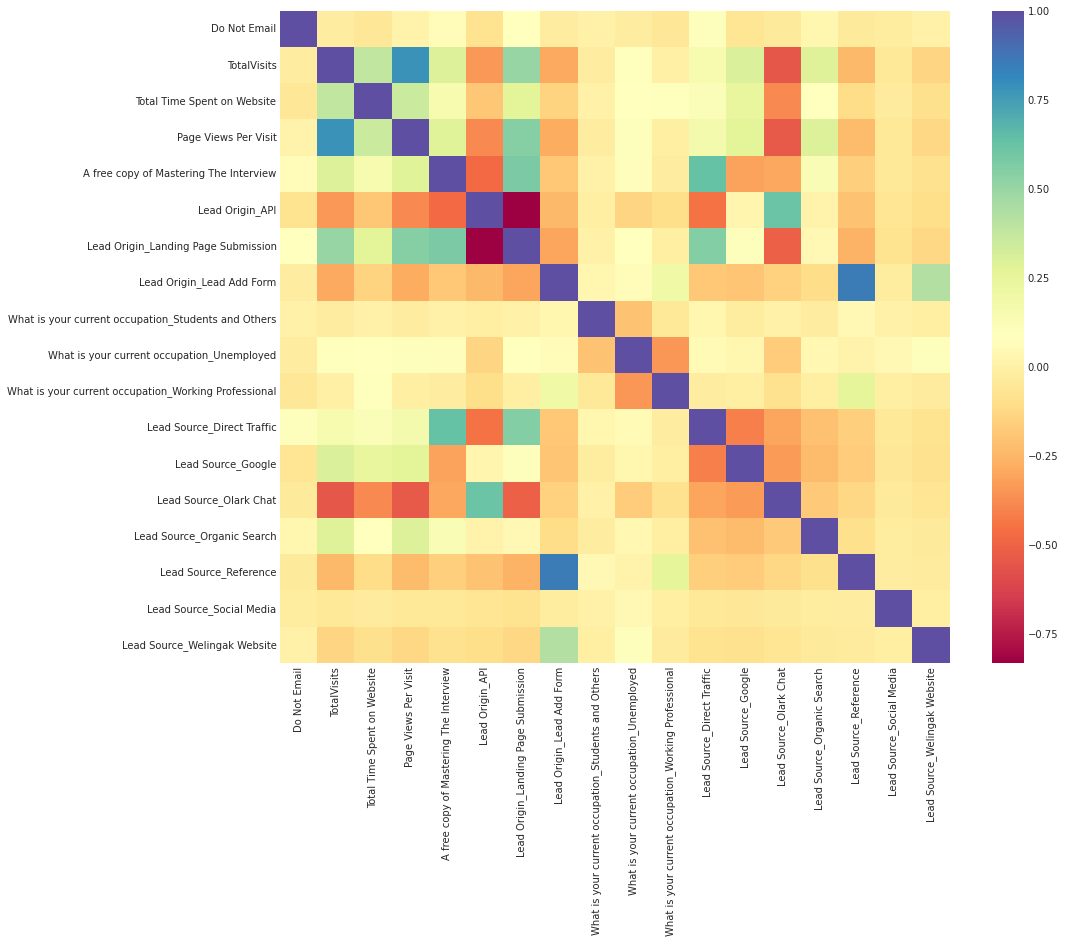

In [329]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, cmap='Spectral')
plt.show()

#### Looks like minimal correlation exists now between the variables we have. This indeed is a sign of low multicollinearity and once we start building our model, we will further drop the highly collinear columns based of p-value and VIF.


Before we proceed with Model Building, we need to further scale our numerical columns to a standard range, in order to ensure that variables belonging to different scales do not create a bias.





<a id="7"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;"> Data Scaling</p>

We need to scale our numerical columns by applying scaler on the numerical variables of train dataset

In [330]:
scaler = StandardScaler()
numeric_cols = x_train.select_dtypes(include=['float', 'int']).columns

x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Students and Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website
5602,-0.30,0.08,0.56,0.45,1.52,0,1,0,0,1,0,0,0,0,1,0,0,0
5036,-0.30,-1.20,-0.86,-1.14,-0.66,1,0,0,0,0,1,0,0,1,0,0,0,0
8970,-0.30,-0.77,-0.27,-0.61,-0.66,1,0,0,0,1,0,0,1,0,0,0,0,0
5328,-0.30,-0.35,-0.46,-0.08,-0.66,0,1,0,0,1,0,0,1,0,0,0,0,0
1929,-0.30,0.93,-0.47,1.51,-0.66,0,1,0,0,0,0,0,1,0,0,0,0,0


In [331]:
x_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Students and Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website'],
      dtype='object')

<a id="8"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Model Building using RFE and Stats Model</p>

#### We will make use Mixed Approach, i.e both  RFE and then Stats Model in order to build our model

**Please Note** : RFE was tried with 20 as well as 15, 16 and 17 variables, but it was selecting variables like :
        
        Specialization and City which were resulting in a significant drop in Model's Sensitivity (an imp factor)
        

        
        
**Keeping this in mind, a clear motive to obtain a stable model with higher sensitivity (80 or more) and Recall :**
    
    
    RFE was tried with 18 variables (all) and did not consider City and Specialization to part of RFE.

In [332]:
lr = LogisticRegression(solver='liblinear')


# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;">8.1 RFE
</p>

In [333]:
# running RFE with 18 variables
rfe = RFE(lr, 18)
rfe = rfe.fit(x_train, y_train)

In [334]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Students and Others', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_Welingak Website', True, 1)]

In [335]:
#list of all columns supported by RFE

cols = x_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Students and Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website'],
      dtype='object')

In [336]:
#creating a new dataframe to store columns along with their respective ranks and support values (status) 

rfe_leads = pd.DataFrame ({'Predictors' : x.columns, 'Status' : rfe.support_, 'Rank' : rfe.ranking_})

In [337]:
rfe_leads.sort_values(by = 'Rank')

,Predictors,Status,Rank
0,Do Not Email,True,1
15,Lead Source_Reference,True,1
14,Lead Source_Organic Search,True,1
13,Lead Source_Olark Chat,True,1
12,Lead Source_Google,True,1
11,Lead Source_Direct Traffic,True,1
10,What is your current occupation_Working Profes...,True,1
9,What is your current occupation_Unemployed,True,1
8,What is your current occupation_Students and O...,True,1
7,Lead Origin_Lead Add Form,True,1


#### Now we have our 18 chosen predictors evaluated by RFE.

The ones ranked as 1 are the top predictors which will have a major impact on the outcome.

#### However, it is not a good practice to fully rely on this and hence we must validate this further using different models and eliminate the features that aren't required or doesn't satify a given criteria.



# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;">8.2 Model Building using Stats Model
</p>

#### NOTE :

    Priority will be given to p-value (should be less than 0.05) over VIF value (should be less than 5)

In [338]:
## we now create a new general function for further calculating the VIF (variance inflation factor) for our models.

def get_vif(df):
    vif_pred =  pd.DataFrame()
    vif_pred['Features']  = x_train[cols].columns
    
    vif_pred['VIF_Value'] = [variance_inflation_factor(x_train[cols].values, v) for v in range(x_train[cols].shape[1])]
    vif_pred['VIF_Value'] = round(vif_pred['VIF_Value'], 2) 
    
    vif_pred = vif_pred.sort_values(by = 'VIF_Value', ascending = False)
    vif_pred = vif_pred.reset_index(drop=True)
    return vif_pred

#### 8.2.1 Model 1

In [339]:
x_train_sm = sm.add_constant(x_train[cols])
logr_m1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6122
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.7
Date:                Sun, 01 May 2022   Deviance:                       5489.4
Time:                        16:11:33   Pearson chi2:                 7.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3631      1.164     -2.029      0.042      -4.645      -0.081
Do Not Email                                            -0.3035      0.044     -6.975      0.000      -0.389      -0.218
TotalVisits                                              0.2429      0.056      4.327      0.000       0.133       0.353
Total Time Spent on Website                              1.0777      0.040     27.162      0.000       1.000       1.155
Page Views Per Visit                                    -0.0483      0.056     -0.869      0.385      -0.157       0.061
A free copy of Mastering The Interview                  -0.0009      0.049     -0.019      0.985      -0.097       0.096
Lead Origin_API                                         -0.2847      1.147     -0.248      0.804      -2.532       1.963
Lead Origin_Landing Page Submission                     -0.4524      1.149     -0.394      0.694      -2.704       1.799
Lead Origin_Lead Add Form                                4.2608      1.286      3.312      0.001       1.740       6.782
What is your current occupation_Students and Others      1.2484      0.202      6.165      0.000       0.851       1.645
What is your current occupation_Unemployed               1.3487      0.086     15.691      0.000       1.180       1.517
What is your current occupation_Working Professional     3.6984      0.194     19.056      0.000       3.318       4.079
Lead Source_Direct Traffic                               0.3696      0.342      1.079      0.280      -0.302       1.041
Lead Source_Google                                       0.5463      0.331      1.649      0.099      -0.103       1.196
Lead Source_Olark Chat                                   1.6432      0.346      4.751      0.000       0.965       2.321
Lead Source_Organic Search                               0.4657      0.340      1.370      0.171      -0.201       1.132
Lead Source_Reference                                   -0.3014      0.586     -0.514      0.607      -1.451       0.848
Lead Source_Social Media                                 0.4027      1.135      0.355      0.723      -1.822       2.627
Lead Source_Welingak Website                             1.7590      0.904      1.945      0.052      -0.014       3.532
========================================================================================================================
"""

**A free copy of Mastering The Interview** has the highest p value. We will drop it

#### 8.2.2 Model 2

In [340]:
cols = cols.drop('A free copy of Mastering The Interview', 1)

In [341]:
get_vif(cols)

,Features,VIF_Value
0,Lead Origin_Landing Page Submission,42.13
1,Lead Origin_API,29.51
2,Lead Source_Google,24.13
3,Lead Source_Direct Traffic,22.50
4,Lead Source_Olark Chat,16.87
5,Lead Origin_Lead Add Form,16.58
6,Lead Source_Reference,12.98
7,Lead Source_Organic Search,9.09
8,Lead Source_Welingak Website,4.02
9,What is your current occupation_Unemployed,3.33


In [342]:
# Building model 2

x_train_sm = sm.add_constant(x_train[cols])
logr_m2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6123
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.7
Date:                Sun, 01 May 2022   Deviance:                       5489.4
Time:                        16:11:34   Pearson chi2:                 7.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3624      1.164     -2.030      0.042      -4.644      -0.081
Do Not Email                                            -0.3035      0.044     -6.976      0.000      -0.389      -0.218
TotalVisits                                              0.2428      0.056      4.350      0.000       0.133       0.352
Total Time Spent on Website                              1.0777      0.040     27.165      0.000       1.000       1.155
Page Views Per Visit                                    -0.0482      0.055     -0.870      0.384      -0.157       0.060
Lead Origin_API                                         -0.2849      1.147     -0.248      0.804      -2.532       1.963
Lead Origin_Landing Page Submission                     -0.4532      1.148     -0.395      0.693      -2.704       1.797
Lead Origin_Lead Add Form                                4.2607      1.286      3.312      0.001       1.740       6.782
What is your current occupation_Students and Others      1.2484      0.202      6.166      0.000       0.852       1.645
What is your current occupation_Unemployed               1.3487      0.086     15.691      0.000       1.180       1.517
What is your current occupation_Working Professional     3.6984      0.194     19.057      0.000       3.318       4.079
Lead Source_Direct Traffic                               0.3687      0.339      1.086      0.277      -0.296       1.034
Lead Source_Google                                       0.5467      0.331      1.652      0.099      -0.102       1.195
Lead Source_Olark Chat                                   1.6432      0.346      4.751      0.000       0.965       2.321
Lead Source_Organic Search                               0.4653      0.339      1.371      0.170      -0.200       1.130
Lead Source_Reference                                   -0.3014      0.586     -0.514      0.607      -1.451       0.848
Lead Source_Social Media                                 0.4027      1.135      0.355      0.723      -1.821       2.627
Lead Source_Welingak Website                             1.7590      0.904      1.945      0.052      -0.014       3.532
========================================================================================================================
"""



**Lead Origin_API** has a high p value. We will drop it

#### 8.3.3 Model 3


In [343]:
cols = cols.drop('Lead Origin_API', 1)

In [344]:
get_vif(cols)

,Features,VIF_Value
0,Lead Origin_Lead Add Form,16.53
1,Lead Source_Reference,12.97
2,Lead Origin_Landing Page Submission,4.94
3,Lead Source_Welingak Website,4.01
4,Lead Source_Direct Traffic,3.95
5,What is your current occupation_Unemployed,3.26
6,TotalVisits,2.98
7,Page Views Per Visit,2.97
8,Lead Source_Google,2.72
9,Lead Source_Olark Chat,2.03


In [345]:
# Building model 3

x_train_sm = sm.add_constant(x_train[cols])
logr_m3 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6124
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.8
Date:                Sun, 01 May 2022   Deviance:                       5489.5
Time:                        16:11:34   Pearson chi2:                 7.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6396      0.330     -8.008      0.000      -3.286      -1.994
Do Not Email                                            -0.3032      0.043     -6.975      0.000      -0.388      -0.218
TotalVisits                                              0.2427      0.056      4.348      0.000       0.133       0.352
Total Time Spent on Website                              1.0777      0.040     27.170      0.000       1.000       1.155
Page Views Per Visit                                    -0.0485      0.055     -0.876      0.381      -0.157       0.060
Lead Origin_Landing Page Submission                     -0.1691      0.100     -1.689      0.091      -0.365       0.027
Lead Origin_Lead Add Form                                4.5370      0.645      7.037      0.000       3.273       5.801
What is your current occupation_Students and Others      1.2468      0.202      6.162      0.000       0.850       1.643
What is your current occupation_Unemployed               1.3490      0.086     15.694      0.000       1.180       1.517
What is your current occupation_Working Professional     3.6987      0.194     19.058      0.000       3.318       4.079
Lead Source_Direct Traffic                               0.3618      0.338      1.071      0.284      -0.300       1.024
Lead Source_Google                                       0.5395      0.329      1.639      0.101      -0.106       1.185
Lead Source_Olark Chat                                   1.6351      0.344      4.754      0.000       0.961       2.309
Lead Source_Organic Search                               0.4582      0.338      1.357      0.175      -0.203       1.120
Lead Source_Reference                                   -0.3011      0.586     -0.514      0.608      -1.450       0.848
Lead Source_Social Media                                 0.6523      0.519      1.256      0.209      -0.365       1.670
Lead Source_Welingak Website                             1.7591      0.904      1.945      0.052      -0.014       3.532
========================================================================================================================
"""

**Lead Source_Reference** has a high p-value. We will drop it

#### 8.3.4 Model 4

In [346]:
cols = cols.drop('Lead Source_Reference', 1)


In [347]:
get_vif(cols)

,Features,VIF_Value
0,Lead Origin_Landing Page Submission,4.94
1,Lead Source_Direct Traffic,3.95
2,What is your current occupation_Unemployed,3.26
3,TotalVisits,2.98
4,Page Views Per Visit,2.97
5,Lead Source_Google,2.72
6,Lead Source_Olark Chat,2.03
7,Lead Origin_Lead Add Form,1.97
8,Lead Source_Organic Search,1.67
9,What is your current occupation_Working Profes...,1.40


In [348]:
# Building model 4

x_train_sm = sm.add_constant(x_train[cols])
logr_m4 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.9
Date:                Sun, 01 May 2022   Deviance:                       5489.8
Time:                        16:11:35   Pearson chi2:                 7.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6414      0.329     -8.018      0.000      -3.287      -1.996
Do Not Email                                            -0.3008      0.043     -6.980      0.000      -0.385      -0.216
TotalVisits                                              0.2429      0.056      4.352      0.000       0.133       0.352
Total Time Spent on Website                              1.0777      0.040     27.171      0.000       1.000       1.155
Page Views Per Visit                                    -0.0485      0.055     -0.875      0.381      -0.157       0.060
Lead Origin_Landing Page Submission                     -0.1693      0.100     -1.691      0.091      -0.365       0.027
Lead Origin_Lead Add Form                                4.2739      0.383     11.162      0.000       3.523       5.024
What is your current occupation_Students and Others      1.2455      0.202      6.153      0.000       0.849       1.642
What is your current occupation_Unemployed               1.3491      0.086     15.697      0.000       1.181       1.518
What is your current occupation_Working Professional     3.6970      0.194     19.050      0.000       3.317       4.077
Lead Source_Direct Traffic                               0.3639      0.338      1.078      0.281      -0.298       1.026
Lead Source_Google                                       0.5418      0.329      1.647      0.100      -0.103       1.186
Lead Source_Olark Chat                                   1.6375      0.344      4.764      0.000       0.964       2.311
Lead Source_Organic Search                               0.4602      0.337      1.364      0.173      -0.201       1.121
Lead Source_Social Media                                 0.6549      0.519      1.262      0.207      -0.363       1.672
Lead Source_Welingak Website                             2.0229      0.740      2.733      0.006       0.572       3.474
========================================================================================================================
"""

#### Page Views Per Visit has a high p-value. We will drop it

#### 8.3.5 Model 5

In [349]:
cols = cols.drop('Page Views Per Visit', 1)

In [350]:
get_vif(cols)

,Features,VIF_Value
0,Lead Origin_Landing Page Submission,4.72
1,Lead Source_Direct Traffic,3.90
2,What is your current occupation_Unemployed,3.26
3,Lead Source_Google,2.71
4,TotalVisits,2.05
5,Lead Origin_Lead Add Form,1.93
6,Lead Source_Olark Chat,1.90
7,Lead Source_Organic Search,1.66
8,What is your current occupation_Working Profes...,1.40
9,Total Time Spent on Website,1.30


In [351]:
# Building model 5

x_train_sm = sm.add_constant(x_train[cols])
logr_m5 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6126
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.3
Date:                Sun, 01 May 2022   Deviance:                       5490.6
Time:                        16:11:35   Pearson chi2:                 7.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6477      0.330     -8.023      0.000      -3.295      -2.001
Do Not Email                                            -0.3012      0.043     -6.992      0.000      -0.386      -0.217
TotalVisits                                              0.2167      0.047      4.590      0.000       0.124       0.309
Total Time Spent on Website                              1.0772      0.040     27.162      0.000       0.999       1.155
Lead Origin_Landing Page Submission                     -0.1878      0.098     -1.920      0.055      -0.380       0.004
Lead Origin_Lead Add Form                                4.3046      0.382     11.273      0.000       3.556       5.053
What is your current occupation_Students and Others      1.2439      0.202      6.144      0.000       0.847       1.641
What is your current occupation_Unemployed               1.3473      0.086     15.684      0.000       1.179       1.516
What is your current occupation_Working Professional     3.6948      0.194     19.043      0.000       3.315       4.075
Lead Source_Direct Traffic                               0.3832      0.337      1.136      0.256      -0.278       1.045
Lead Source_Google                                       0.5527      0.329      1.678      0.093      -0.093       1.198
Lead Source_Olark Chat                                   1.6681      0.343      4.869      0.000       0.997       2.340
Lead Source_Organic Search                               0.4606      0.338      1.363      0.173      -0.202       1.123
Lead Source_Social Media                                 0.6730      0.519      1.296      0.195      -0.345       1.691
Lead Source_Welingak Website                             2.0237      0.740      2.734      0.006       0.573       3.474
========================================================================================================================
"""

#### 8.3.6 Model 6

p-value of **Lead Source_Direct Traffic** is higher than 0.05 and hence this one needs to be dropped

In [352]:
cols = cols.drop('Lead Source_Direct Traffic', 1)

In [353]:
get_vif(cols)

,Features,VIF_Value
0,What is your current occupation_Unemployed,2.73
1,Lead Origin_Landing Page Submission,2.21
2,TotalVisits,2.03
3,Lead Origin_Lead Add Form,1.85
4,Lead Source_Olark Chat,1.84
5,Lead Source_Google,1.56
6,What is your current occupation_Working Profes...,1.34
7,Total Time Spent on Website,1.30
8,Lead Source_Organic Search,1.27
9,Lead Source_Welingak Website,1.26


In [354]:
# Building model 6

x_train_sm = sm.add_constant(x_train[cols])
logr_m6 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6127
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.9
Date:                Sun, 01 May 2022   Deviance:                       5491.9
Time:                        16:11:35   Pearson chi2:                 7.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3056      0.128    -17.978      0.000      -2.557      -2.054
Do Not Email                                            -0.3018      0.043     -7.004      0.000      -0.386      -0.217
TotalVisits                                              0.2122      0.047      4.513      0.000       0.120       0.304
Total Time Spent on Website                              1.0774      0.040     27.164      0.000       1.000       1.155
Lead Origin_Landing Page Submission                     -0.1612      0.095     -1.698      0.090      -0.347       0.025
Lead Origin_Lead Add Form                                3.9565      0.224     17.635      0.000       3.517       4.396
What is your current occupation_Students and Others      1.2504      0.202      6.178      0.000       0.854       1.647
What is your current occupation_Unemployed               1.3491      0.086     15.712      0.000       1.181       1.517
What is your current occupation_Working Professional     3.6960      0.194     19.048      0.000       3.316       4.076
Lead Source_Google                                       0.1951      0.092      2.123      0.034       0.015       0.375
Lead Source_Olark Chat                                   1.3197      0.147      8.963      0.000       1.031       1.608
Lead Source_Organic Search                               0.1054      0.124      0.847      0.397      -0.138       0.349
Lead Source_Social Media                                 0.3249      0.417      0.778      0.436      -0.493       1.143
Lead Source_Welingak Website                             2.0229      0.740      2.733      0.006       0.572       3.474
========================================================================================================================
"""

**Lead Source_Social Media has high p-value**. We need to drop it

#### 8.3.7 Model 7

In [355]:
cols = cols.drop('Lead Source_Social Media', 1)

In [356]:
get_vif(cols)

,Features,VIF_Value
0,What is your current occupation_Unemployed,2.67
1,Lead Origin_Landing Page Submission,2.20
2,TotalVisits,2.02
3,Lead Origin_Lead Add Form,1.83
4,Lead Source_Olark Chat,1.82
5,Lead Source_Google,1.55
6,What is your current occupation_Working Profes...,1.34
7,Total Time Spent on Website,1.30
8,Lead Source_Organic Search,1.27
9,Lead Source_Welingak Website,1.26


In [357]:
 #Building model 7

x_train_sm = sm.add_constant(x_train[cols])
logr_m7 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6128
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.2
Date:                Sun, 01 May 2022   Deviance:                       5492.5
Time:                        16:11:35   Pearson chi2:                 7.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2872      0.126    -18.169      0.000      -2.534      -2.040
Do Not Email                                            -0.3024      0.043     -7.023      0.000      -0.387      -0.218
TotalVisits                                              0.2104      0.047      4.480      0.000       0.118       0.302
Total Time Spent on Website                              1.0755      0.040     27.182      0.000       0.998       1.153
Lead Origin_Landing Page Submission                     -0.1737      0.093     -1.858      0.063      -0.357       0.010
Lead Origin_Lead Add Form                                3.9328      0.222     17.699      0.000       3.497       4.368
What is your current occupation_Students and Others      1.2517      0.202      6.185      0.000       0.855       1.648
What is your current occupation_Unemployed               1.3511      0.086     15.746      0.000       1.183       1.519
What is your current occupation_Working Professional     3.6980      0.194     19.055      0.000       3.318       4.078
Lead Source_Google                                       0.1842      0.091      2.030      0.042       0.006       0.362
Lead Source_Olark Chat                                   1.2965      0.144      9.000      0.000       1.014       1.579
Lead Source_Organic Search                               0.0946      0.124      0.766      0.444      -0.148       0.337
Lead Source_Welingak Website                             2.0228      0.740      2.733      0.006       0.572       3.474
========================================================================================================================
"""

**Lead Source_Organic Search has a high p-value.** We will drop it.

  

#### 8.3.8 Model 8

In [358]:
cols = cols.drop('Lead Source_Organic Search', 1)

In [359]:
 #Building model 8

x_train_sm = sm.add_constant(x_train[cols])
logr_m8 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6129
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.5
Date:                Sun, 01 May 2022   Deviance:                       5493.1
Time:                        16:11:35   Pearson chi2:                 7.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2460      0.114    -19.775      0.000      -2.469      -2.023
Do Not Email                                            -0.3021      0.043     -7.012      0.000      -0.386      -0.218
TotalVisits                                              0.2195      0.045      4.833      0.000       0.130       0.309
Total Time Spent on Website                              1.0756      0.040     27.179      0.000       0.998       1.153
Lead Origin_Landing Page Submission                     -0.1954      0.089     -2.193      0.028      -0.370      -0.021
Lead Origin_Lead Add Form                                3.9021      0.218     17.860      0.000       3.474       4.330
What is your current occupation_Students and Others      1.2483      0.202      6.171      0.000       0.852       1.645
What is your current occupation_Unemployed               1.3512      0.086     15.748      0.000       1.183       1.519
What is your current occupation_Working Professional     3.6997      0.194     19.060      0.000       3.319       4.080
Lead Source_Google                                       0.1518      0.080      1.893      0.058      -0.005       0.309
Lead Source_Olark Chat                                   1.2654      0.138      9.164      0.000       0.995       1.536
Lead Source_Welingak Website                             2.0228      0.740      2.733      0.006       0.572       3.474
========================================================================================================================
"""

In [360]:
get_vif(cols)

,Features,VIF_Value
0,What is your current occupation_Unemployed,2.50
1,Lead Origin_Landing Page Submission,2.20
2,TotalVisits,1.88
3,Lead Origin_Lead Add Form,1.83
4,Lead Source_Olark Chat,1.81
5,Lead Source_Google,1.45
6,What is your current occupation_Working Profes...,1.32
7,Total Time Spent on Website,1.30
8,Lead Source_Welingak Website,1.26
9,What is your current occupation_Students and O...,1.07


All VIF values look good but **p-value for Lead Source_Google** slightly at the borderline of 0.5. 

    Considering it's low coefficicent value, this may not be an important variable and hence we go ahead amd drop it.



#### 8.3.9 Model 9

In [361]:
cols = cols.drop('Lead Source_Google', 1)

In [362]:
 #Building model 9

x_train_sm = sm.add_constant(x_train[cols])
logr_m9 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6130
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.3
Date:                Sun, 01 May 2022   Deviance:                       5496.6
Time:                        16:11:36   Pearson chi2:                 7.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1514      0.102    -21.176      0.000      -2.351      -1.952
Do Not Email                                            -0.3052      0.043     -7.096      0.000      -0.389      -0.221
TotalVisits                                              0.2228      0.045      4.917      0.000       0.134       0.312
Total Time Spent on Website                              1.0802      0.040     27.329      0.000       1.003       1.158
Lead Origin_Landing Page Submission                     -0.2348      0.087     -2.712      0.007      -0.405      -0.065
Lead Origin_Lead Add Form                                3.8183      0.214     17.862      0.000       3.399       4.237
What is your current occupation_Students and Others      1.2399      0.202      6.132      0.000       0.844       1.636
What is your current occupation_Unemployed               1.3493      0.086     15.722      0.000       1.181       1.518
What is your current occupation_Working Professional     3.7009      0.194     19.067      0.000       3.320       4.081
Lead Source_Olark Chat                                   1.1788      0.130      9.074      0.000       0.924       1.433
Lead Source_Welingak Website                             2.0232      0.740      2.733      0.006       0.572       3.474
========================================================================================================================
"""

In [363]:
get_vif(cols)

,Features,VIF_Value
0,What is your current occupation_Unemployed,2.28
1,Lead Origin_Landing Page Submission,2.17
2,TotalVisits,1.86
3,Lead Origin_Lead Add Form,1.81
4,Lead Source_Olark Chat,1.81
5,Total Time Spent on Website,1.29
6,What is your current occupation_Working Profes...,1.29
7,Lead Source_Welingak Website,1.26
8,What is your current occupation_Students and O...,1.07
9,Do Not Email,1.03


    All variables now have VIF values < 5 and p-values < 0.05

**We will consider this as our final model and keep these 10 variables**


<a id="9"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Evaluating Feature Importance</p>



In [364]:
pd.options.display.float_format = '{:.2f}'.format
model_params = res.params[1:]
model_params

Do Not Email                                           -0.31
TotalVisits                                             0.22
Total Time Spent on Website                             1.08
Lead Origin_Landing Page Submission                    -0.23
Lead Origin_Lead Add Form                               3.82
What is your current occupation_Students and Others     1.24
What is your current occupation_Unemployed              1.35
What is your current occupation_Working Professional    3.70
Lead Source_Olark Chat                                  1.18
Lead Source_Welingak Website                            2.02
dtype: float64

In [365]:
# We will now evaluate a RELATIVE COEFFICIENT value for all the above features (wrt to highest coeff variable)

In [366]:
feature_imp = model_params
feature_imp = 100.0 * (feature_imp / feature_imp.max())
feature_imp 

Do Not Email                                            -7.99
TotalVisits                                              5.83
Total Time Spent on Website                             28.29
Lead Origin_Landing Page Submission                     -6.15
Lead Origin_Lead Add Form                              100.00
What is your current occupation_Students and Others     32.47
What is your current occupation_Unemployed              35.34
What is your current occupation_Working Professional    96.93
Lead Source_Olark Chat                                  30.87
Lead Source_Welingak Website                            52.99
dtype: float64

In [367]:
#sorting all the values

sorted_imp = np.argsort(feature_imp, kind='quicksort', order='list of str')
sorted_imp

Do Not Email                                            0
TotalVisits                                             3
Total Time Spent on Website                             1
Lead Origin_Landing Page Submission                     2
Lead Origin_Lead Add Form                               8
What is your current occupation_Students and Others     5
What is your current occupation_Unemployed              6
What is your current occupation_Working Professional    9
Lead Source_Olark Chat                                  7
Lead Source_Welingak Website                            4
dtype: int64

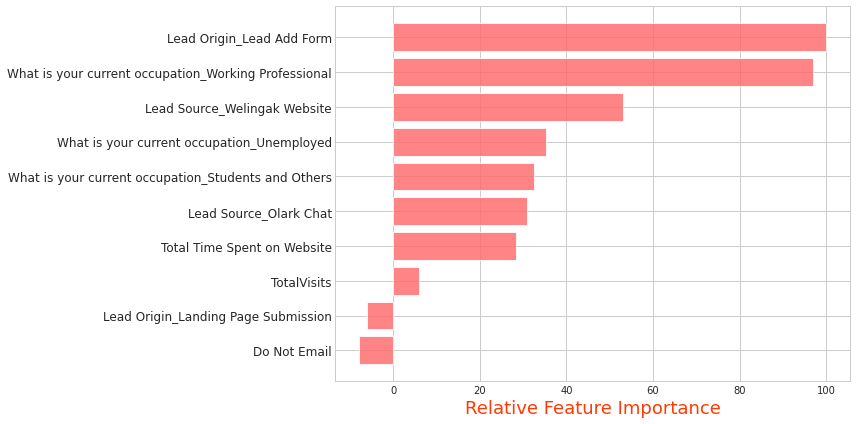

In [368]:
#plot the features importance

p =  np.arange(sorted_imp.shape[0]) + 0.5

fig = plt.figure(figsize=(12,6))
ax= fig.add_subplot(1,1,1)
ax.barh(p, feature_imp[sorted_imp], align='center', color= '#ff6667', alpha=0.8)
ax.set_yticks(p)

ax.set_yticklabels(np.array(x_train[cols].columns)[sorted_imp], fontsize =12)
ax.set_xlabel('Relative Feature Importance', fontsize= 18, color='#ff3901')

plt.tight_layout()
plt.show()


In [369]:
# extracting all the predicted values from training set

y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

5602   0.42
5036   0.83
8970   0.24
5328   0.18
1929   0.07
7540   0.02
7029   0.13
7293   0.07
3885   0.80
791    0.46
dtype: float64

In [370]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.42130896, 0.83473492, 0.23587715, 0.18031355, 0.06973321,
       0.02065079, 0.12919969, 0.06995419, 0.79758822, 0.46130227])

In [371]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Converted_prob' : y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.42,5602
1,1,0.83,5036
2,0,0.24,8970
3,0,0.18,5328
4,0,0.07,1929


#### Creating a new column as "Predicted" with 1 if the probability > 0.5, else 0

In [372]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x>0.5 else 0)

#check the head again
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.42,5602,0
1,1,0.83,5036,1
2,0,0.24,8970,0
3,0,0.18,5328,0
4,0,0.07,1929,0



<a id="10"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Model Metrics Evaluation</p>

#### Steps followed :
    
    - Derive Classification Report and corresponding metrics as per initial cutoff of 0.5
    
    - Derive Confusion matrix on Training Dataset as per initial cutoff of 0.5
    
    - Get all the other metrics scores as per initial cutoff of 0.5
    
    - Plot ROC Curve and derive AUC (area under the curve) for initial cutoff (0.5)
    
    - Calculate the predicted values for different cutoff between 0 to 1 and arrive at an OPTIMAL CUTOFF
    
    - Get the final predictions and all the metrics for the new cutoff
    
    - Assign Lead Score to each Lead on the Training dataset as per the Conversion Probability predicted by Final model.
    
    - Plot the Precision-Recall curve and get their trade-off.

### 10.1 Classification Report (with initial cutoff : 0.5)

In [373]:
print (classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3817
           1       0.79      0.65      0.71      2324

    accuracy                           0.80      6141
   macro avg       0.80      0.77      0.78      6141
weighted avg       0.80      0.80      0.80      6141



### 10.2 Confusion Matrix

In [374]:
def plot_cm(actual, predicted):

    cm = confusion_matrix(actual, predicted)
    plt.clf()
    sns.set_style('white')
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
    classname = ['Negative', 'Positive']
    plt.title('CONFUSION MATRIX', fontsize=20, color= '#ff4941')
    plt.ylabel('Actual Converted', fontsize = 16, color= "coral")
    plt.xlabel('Predicted Converted', fontsize = 16, color= "coral")
    
    ticks= np.arange(len(classname))
    plt.xticks(ticks, classname, fontsize=12)
    plt.yticks(ticks, classname, fontsize=12)
    
    met = [['TN', 'FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(met[i][j])+" = "+str(cm[i][j]), fontsize=12, ha='center')
    plt.show()

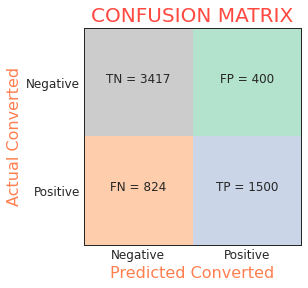

In [375]:
plot_cm(y_train_pred_final.Converted, y_train_pred_final.Predicted)

### 10.3 Model metrics Calculation

In [376]:
def get_metrics(actual, predicted) :
    confusion = confusion_matrix(actual, predicted)
    
    #evaluating accuracy
    Accuracy = metrics.accuracy_score(actual, predicted)
    
    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0]    
    
    #----------------other metrics------------------#
    
    #sensitivity
    Sensitivity = TP/float(TP+FN)
    
    #specificity
    Specificity = TN/float(TN+FP)
    
    #Precision
    Precision = TP/float(TP+FP)
    
    #Recall
    Recall = TP/float(TP+FN)
    
    #False Positive Rate 
    FPR = FP/(TN+FP)
    
    #Positive predictive value
    PPV = TP/float(TP+FP)
    
    #Negative predictive value
    NPV = TN/float(TN+FN)
    
    #FI-SCORE (Harmonic mean of Precision-Recall)
    FI = 2*(Precision*Recall)/(Precision + Recall)
    
    
    #------------------print metrics-----------------#
    
    print (f'\nThe Confusion Matrix is \n \n {confusion}\n \n')
    print (f'The Accuracy is :  {round (Accuracy,2)} ({Accuracy})\n')
    print (f'The Sensitivity is :  {round (Sensitivity,2)} ({Sensitivity})\n')
    print (f'The Specificity is :  {round (Specificity,2)} ({Specificity})\n')
    print (f'The Precision is   :  {round (Precision,2)} ({Precision})\n')
    print (f'The Recall is      :  {round (Recall,2)} ({Recall}\n')
    print (f'The FI Score is    :  {round (FI,2)} ({FI}\n')
    print (f'The False Positive Rate : {round (FPR, 2)} ({FPR})\n')
    print (f'The Positive Predictive Value : {round (PPV, 2)} ({PPV})\n')
    print (f'The Negative Predictive Value : {round (NPV, 2)} ({NPV})\n')
       

In [377]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)


The Confusion Matrix is 
 
 [[3417  400]
 [ 824 1500]]
 

The Accuracy is :  0.8 (0.8006839276990718)

The Sensitivity is :  0.65 (0.6454388984509466)

The Specificity is :  0.9 (0.8952056588944197)

The Precision is   :  0.79 (0.7894736842105263)

The Recall is      :  0.65 (0.6454388984509466

The FI Score is    :  0.71 (0.7102272727272727

The False Positive Rate : 0.1 (0.1047943411055803)

The Positive Predictive Value : 0.79 (0.7894736842105263)

The Negative Predictive Value : 0.81 (0.805706201367602)



**Confusion Matrix elements :**
    
    TP = confusion[1,1] ==> actual = predicted = 1 (converted)
    TN = confusion[0,0] ==> actual = predicted = 0 (not-converted)
    FP = confusion[0,1] ==> actual (0) != predicted (1) 
    FN = confusion[1,0] ==> actual (1) != predicted (0) 
    
 
    

### 10.4 ROC Curve

- ROC Curve mainly shows the trade-off between Sensitivity and Specificity
- It is always an inversely proportional relationship, if sensitivity increases, sensitivity decreases.
- An ROC curve which is closer to the left boundary than right, is considered more accurate
- In case ROC curve is closer to the 45 degree diagonal drawn, it is considered less accurate



In [378]:
#### We will now create a function to plot ROC curve with AUC score

def plot_roc(actual, pred) :
    
    #creating all the values required by the curve : False-pos rate, True-pos rate and the Threshold
    fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)
    plt.style.use('Solarize_Light2')

    #Calculating the auc (area under the curve) score
    auc = roc_auc_score(actual, pred)
    
    #Setting figure parameters
    plt.figure(figsize=(10,6))
    plt.style.use('seaborn-whitegrid')
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc, color='green')
    plt.plot([0,1], [0,1], 'r--') #for 45-deg line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    #setting labels
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('ROC - Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
   #no return needed 
    return None    

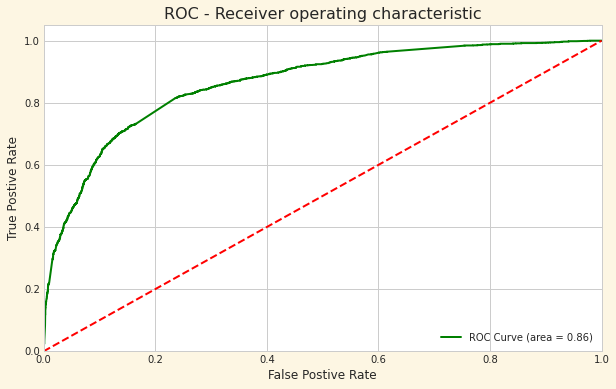

In [379]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


#### Observation

- ROC curve is **closer to the left boundary**, indicating model accuracy is quite high

- **Area under the curve** (AUC) should be closer to maximum (i.e 1) and here we have it **0.86 which indicates a good predictive model**

### 10.5  Find the optimal cut-off point

- Initially we had chosen an optimal cutoff of 0.5 for probability. 
- We must determine the best optimal cut-off value now

In [380]:
# Let us create 10 different columns with different probabilities and we will then select the most optimal one

nums = [float(n)/10 for n in range(10)]

for s in nums:
    y_train_pred_final[s] = y_train_pred_final['Converted_prob'].map(lambda n:1 if n>s else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.42,5602,0,1,1,1,1,1,0,0,0,0,0
1,1,0.83,5036,1,1,1,1,1,1,1,1,1,1,0
2,0,0.24,8970,0,1,1,1,0,0,0,0,0,0,0
3,0,0.18,5328,0,1,1,0,0,0,0,0,0,0,0
4,0,0.07,1929,0,1,0,0,0,0,0,0,0,0,0


In [381]:
# Calculating the accuracy, sensitivity and specificity for the above probability cutoffs

#creating a new dataframe to contain all values
df_cutoff = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

#var will contain numbers from 0 to 0.9 with an interval of 0.1
var=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for v in var:
    cm = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[v])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    df_cutoff.loc[v]=[v, accuracy, sensitivity, specificity]
    
print(df_cutoff)

      Probability  Accuracy  Sensitivity  Specificity
0.00         0.00      0.38         1.00         0.00
0.10         0.10      0.52         0.98         0.23
0.20         0.20      0.70         0.90         0.57
0.30         0.30      0.77         0.83         0.74
0.40         0.40      0.80         0.69         0.87
0.50         0.50      0.80         0.65         0.90
0.60         0.60      0.79         0.57         0.92
0.70         0.70      0.77         0.47         0.94
0.80         0.80      0.74         0.37         0.97
0.90         0.90      0.69         0.19         0.99


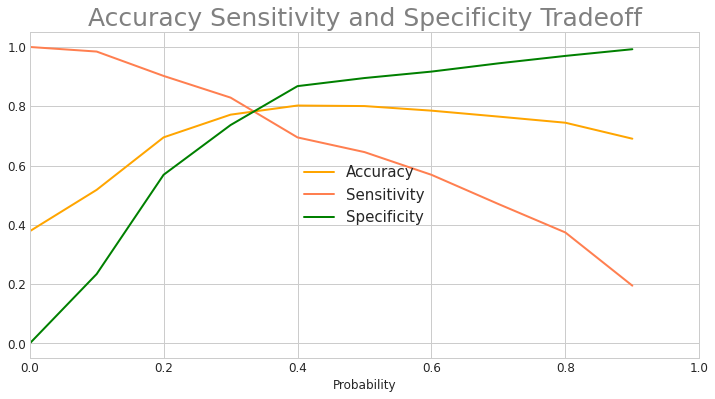

In [382]:
# We will now plot the accuracy, sensitivity and specificity for the above probability values and check the optimum point

df_cutoff.plot(x='Probability', y=['Accuracy', 'Sensitivity', 'Specificity'], figsize=(12,6), fontsize='12', color =  ['orange','coral','green'])
plt.title("Accuracy Sensitivity and Specificity Tradeoff", fontsize='25', color ='crimson')
plt.legend(labels = ["Accuracy", 'Sensitivity', 'Specificity'], loc="center", fontsize="15")
plt.xlim(0, 1)
plt.show()

#### From the above plot, 0.32 seems to be the optimum point to be considered as cutoff for probability

In [383]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.32 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.42,5602,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.83,5036,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.24,8970,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.18,5328,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.07,1929,0,1,0,0,0,0,0,0,0,0,0,0


### Final Metrics on Train Data

In [384]:
#Evaluating all the metrics for Training dataset considering the cutoff at 0.32

print(f'\n FINAL METRICS For Training Dataset (considering cutoff at : 0.32)')
print(f'-------------------------------------------------------------------- ')
print(f'--------------------------------------------------------------------')
get_metrics(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


 FINAL METRICS For Training Dataset (considering cutoff at : 0.32)
-------------------------------------------------------------------- 
--------------------------------------------------------------------

The Confusion Matrix is 
 
 [[2901  916]
 [ 424 1900]]
 

The Accuracy is :  0.78 (0.7817944960104217)

The Sensitivity is :  0.82 (0.8175559380378657)

The Specificity is :  0.76 (0.7600209588682211)

The Precision is   :  0.67 (0.6747159090909091)

The Recall is      :  0.82 (0.8175559380378657

The FI Score is    :  0.74 (0.7392996108949416

The False Positive Rate : 0.24 (0.2399790411317789)

The Positive Predictive Value : 0.67 (0.6747159090909091)

The Negative Predictive Value : 0.87 (0.8724812030075187)



#### Confusion Metrics for Training Dataset

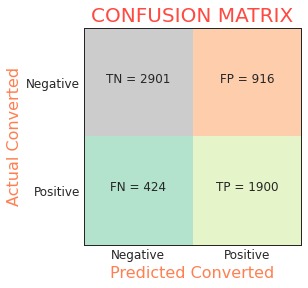

In [385]:
plot_cm(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

### 10.6 LEAD SCORE ASSIGNMENT

In [386]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final[['Converted', 'Converted_prob', 'Prospect ID', 'final_predicted', 'Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,1,0.42,5602,1,42
1,1,0.83,5036,1,83
2,0,0.24,8970,0,24
3,0,0.18,5328,0,18
4,0,0.07,1929,0,7


**Final metrics (Training Data) :**
    
     1. Accuracy : 78.17
     2. Sensitivity : 81.75
     3. Specificity : 76


### 10.7 Precision-recall curve

In [387]:
#y_train_pred_final.Converted, y_train_pred_final.final_predicted

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

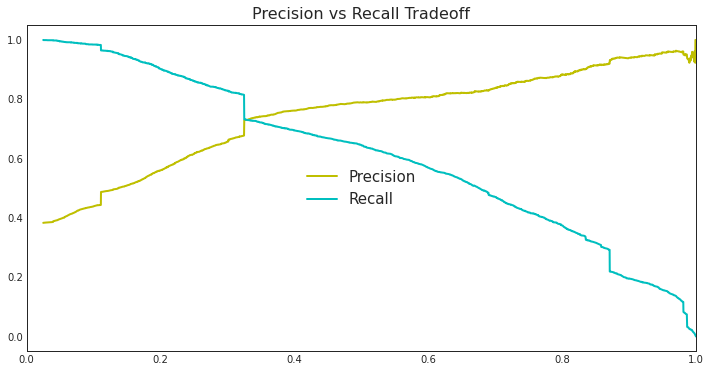

In [388]:
plt.figure(figsize=(12,6))
plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "c-")
plt.xlim(0, 1)
plt.legend(labels = ["Precision", 'Recall'], loc="center", fontsize="15")
plt.title("Precision vs Recall Tradeoff")
plt.show()



<a id="11"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Model Validation</p>

**STEPS FOLLOWED IN ORDER TO VALIDATE  THE MODEL (with test dataset) :**
    
        1. Fit the variables on Test Dataset with Scalar
        2. Make predictions on the test dataset
        3. Create amother dataset with Prospect ID and the conversion probability foe each record
        4. Generate the Final Lead Score for Test dataset based on probability predicted from final model
        5. Use the optimal threshold to genrate the final Predictive values
        6. Get all the evaluation metrics for the test dataset with actual converted valuesand final predicted values

### 11.1 Predictions on Test Data Set

In [389]:
#creating object : scaler= StandardScaler()
numeric_cols = x_test.select_dtypes(include=['float', 'int']).columns
x_test[numeric_cols]= scaler.transform(x_test[numeric_cols])
x_test.head()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2632 entries, 4595 to 7570
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2632 non-null   float64
 1   TotalVisits                                           2632 non-null   float64
 2   Total Time Spent on Website                           2632 non-null   float64
 3   Page Views Per Visit                                  2632 non-null   float64
 4   A free copy of Mastering The Interview                2632 non-null   float64
 5   Lead Origin_API                                       2632 non-null   uint8  
 6   Lead Origin_Landing Page Submission                   2632 non-null   uint8  
 7   Lead Origin_Lead Add Form                             2632 non-null   uint8  
 8   What is your current occupation_Students and Others   2

In [390]:
x_test= x_test[cols]
x_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Students and Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Welingak Website
4595,-0.30,0.51,1.73,1,0,0,1,0,0,0
898,-0.30,-0.35,-0.56,1,0,0,1,0,0,0
6597,-0.30,0.51,-0.68,1,0,0,1,0,0,0
8303,3.33,0.08,-0.75,1,0,0,0,0,0,0
4300,-0.30,-0.35,1.48,0,0,0,0,0,0,0


In [391]:
x_test_sm = sm.add_constant(x_test)

In [392]:
y_test_pred = res.predict(x_test_sm)
y_test_pred[:5]

4595   0.74
898    0.16
6597   0.17
8303   0.01
4300   0.37
dtype: float64

In [393]:
#Let's convert y_pred to a dataframe for better understanding

y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4595,0.74
898,0.16
6597,0.17
8303,0.01
4300,0.37


In [394]:
#Now let's convert y_test to a dataframe for better understanding

y_test_df = pd.DataFrame(y_test)

In [395]:
#Having ProspectID as index

y_test_df['Prospect ID'] = y_test_df.index

In [396]:
#Appending both dataframes side by side (column wise)

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [397]:
y_pred_final= pd.concat([y_test_df, y_pred_df], axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4595,0.74
1,0,898,0.16
2,0,6597,0.17
3,0,8303,0.01
4,0,4300,0.37


In [398]:
# Let's rename column 0 as Converted_Probability

y_pred_final = y_pred_final.rename(columns={0: 'Converted_Probability'})

In [399]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Probability
0,0,4595,0.74
1,0,898,0.16
2,0,6597,0.17
3,0,8303,0.01
4,0,4300,0.37


In [400]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Probability']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Probability.map(lambda x: round(x*100))

In [401]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,Lead_Score
0,4595,0,0.74,74
1,898,0,0.16,16
2,6597,0,0.17,17
3,8303,0,0.01,1
4,4300,0,0.37,37


In [402]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x>0.32 else 0)

In [403]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,Lead_Score,final_predicted
0,4595,0,0.74,74,1
1,898,0,0.16,16,0
2,6597,0,0.17,17,0
3,8303,0,0.01,1,0
4,4300,0,0.37,37,1


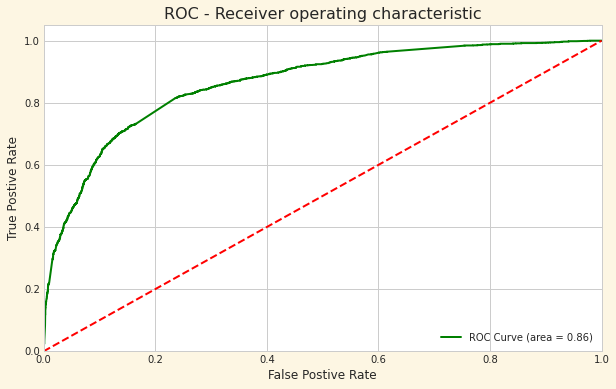

In [404]:
#ROC Curve for test dataset
plot_roc(y_pred_final.Converted, y_pred_final.Converted_Probability)

**AUC score of 0.86** is good enough to ensure a **high performance model** (through there is always a scope for betterment).

    Also, the plot is leaned towards the left boundary and upper edge which is sign of a good predictive model

### 11.2 Metrics on Test Data

In [405]:
#Evaluating all the metrics for Test dataset considering the cutoff at 0.32

print(f'\n FINAL METRICS For Test Dataset (considering cutoff at : 0.32)')
print(f'-------------------------------------------------------------------- ')
print(f'--------------------------------------------------------------------')
get_metrics(y_pred_final.Converted, y_pred_final.final_predicted)


 FINAL METRICS For Test Dataset (considering cutoff at : 0.32)
-------------------------------------------------------------------- 
--------------------------------------------------------------------

The Confusion Matrix is 
 
 [[1214  403]
 [ 173  842]]
 

The Accuracy is :  0.78 (0.7811550151975684)

The Sensitivity is :  0.83 (0.8295566502463054)

The Specificity is :  0.75 (0.7507730364873222)

The Precision is   :  0.68 (0.6763052208835342)

The Recall is      :  0.83 (0.8295566502463054

The FI Score is    :  0.75 (0.7451327433628318

The False Positive Rate : 0.25 (0.24922696351267778)

The Positive Predictive Value : 0.68 (0.6763052208835342)

The Negative Predictive Value : 0.88 (0.875270367700072)



### Confusion Matrix (Test-Data)

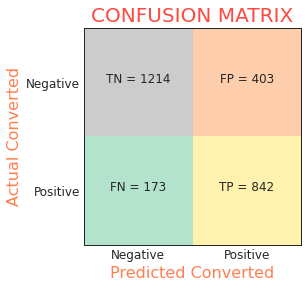

In [406]:
plot_cm(y_pred_final.Converted, y_pred_final.final_predicted)

In [407]:
# Precision-recall curve for Test data

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Probability)

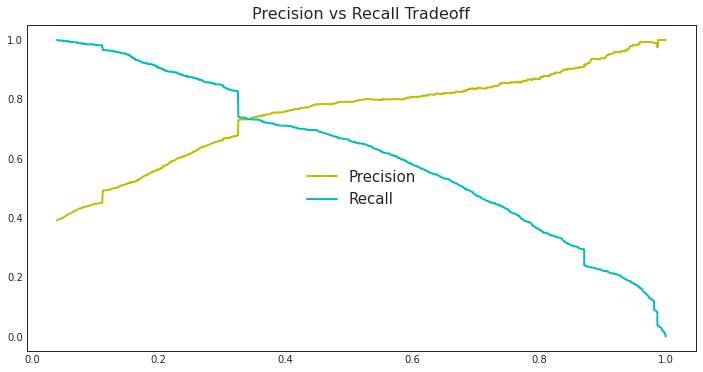

In [408]:
plt.figure(figsize=(12,6))
plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "c-")
plt.legend(labels = ["Precision", 'Recall'], loc="center", fontsize="15")
plt.title("Precision vs Recall Tradeoff")
plt.show()

#### Calculating the FI score (Harmonic mean of Precision and Recall)

As we know, **FI score is the Harmonic mean of Precision and Recall scores and it penalises the model towards the lower metric**. It is another useful metric to measure out model's stability and performance

**FI Score = 2* Recall-Score * Precision-Score / Recall Score + Precision Score**

As expected, we have **FI-Score of 0.7451 (74.51)** (between Recall and Precision scores)

**Final metrics :**

1. Accuracy : 78.11
2. Sensitivity : 82.95
3. Specificity : 75

### Test and Train Data Metrics Comparison

**Training Data :**
    
    1. Accuracy : 78.17
    2. Sensitivity : 81.75
    3. Specificity : 76
          
    

**Test Data :**
    
    1. Accuracy : 78.11
    2. Sensitivity : 82.95
    3. Specificity : 75

**This confirms that our Model predicts the Conversion Rate quite well and we should be able to give good amount of confidence to the CEO in making Business Level Decisions based on this Model**



<a id="12"></a>
# <p style="background-color:crimson;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">Insights & Conclusion</p>

**1. Variables that play a crucial role towards getting Potential Leads are :**
    
    
    - Top 3 Features from RFE (with highest coeff):
       
     Lead Origin_Lead Add Form
     What is your current occupation_Working
     Lead Source_Welingak Website
   
       
    
**2. As per Business term & conditions, the model has an ability to adjust** and perform well with the company’s changing requirements in future **[Recall > Precision ensures that we are least likely to miss out on any potential lead]**  : 
    
        Recall score :  82.95
        Precision :     67.63    


**3. All the above 3 show promising and high scores on Test set and match well with the training data set metrics.**

    
        1. Accuracy : 78.11
        2. Sensitivity : 82.95
        3. Specificity : 75
       


# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:crimson;text-align:left;border-radius:20px 60px;"> What needs to be done ?
</p>


#### As per our analysis and final model predictions following are some of the crucial measures that needs to be taken by X Education to improve the Conversion Rate :-



**Relying on the data provided by Sales team, taking the following actions can help  :**
    
    
    1. Focus more on Leads with “Will revert after reading email”  and “Closed by Horizzon” tags
       
    2. Focus more on leads with : Last activity marked as "SMS Sent" and "Email Opened"
       
    3. Do not focus upon leads with Last notable activity : "Modified" as they are high in number but very less likely to get converted and hence not worth the time.


            
**As per our final model  :**
    
    
    1. Leads generated through Lead add form & Welingak Website show very high conversion rates and should be focused upon.
   
    2. Leads who are working professionals also show great conversion rates and should be focused upon. 
  
    3. Leads who are currently unemployed, also show good conversion rate. Focussing more on them and providing benefits like additional discount can improve it

    
    
**As per our EDA analysis :**
    
    
    1. Leads with Management specialization are more likely to get converted & must be focused upon.
    
    2. Leads through source : Reference and Google have a fair conversion rate, but can be improved further through better advertising and offers
    
    3. Most Leads look out for this course in search for Better career prospects and hence the company can ensure they include pay hike / job switch/ promotion examples and real stories from their alumini on their website in order to gain more leads


# <p style="background-color:crimson;font-family:newtimeroman;font-size:170%;color:white;text-align:center;border-radius:20px 60px;">THANK YOU</p>

![](https://blog.abcontent.com.br/wp-content/uploads/2020/03/Canva-Magnet-Attracting-Paper-Candidates-On-Table.jpg)